> edit

- GConvGRU
- DCRNN
- GConvLSTM
- MPNNLSTM
- TGCN
- EvolveGCNO
- GCLSTM
- LRGCN
- EvolveGCNH
- DyGrEncoder

# 교수님 설정(수정 안 한 것)

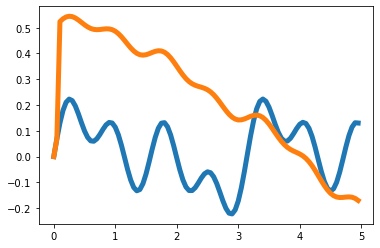

In [54]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [ ]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [ ]:
dataset_DCRNN = loader1.get_dataset(lags=1)

In [ ]:
mindex = [[np.array(list(range(20,35)))],random.sample(range(0, T), int(T*0.5))]
dataset_miss_DCRNN = itstgcn.miss(dataset_DCRNN,mindex,mtype='block')

In [ ]:
dataset_padded_DCRNN = itstgcn.padding(dataset_miss_DCRNN,interpolation_method='linear')

In [ ]:
lrnr_DCRNN = itstgcn.StgcnLearner(dataset_padded_DCRNN)

In [ ]:
lrnr_DCRNN.learn(filters=1,epoch=10,lr=0.01,RecurrentGCN='GConvLSTM')

In [ ]:
evtor_DCRNN = Eval_csy(lrnr_DCRNN,dataset_padded_DCRNN)

In [ ]:
lrnr_DCRNN2 = itstgcn.ITStgcnLearner(dataset_padded_DCRNN)

In [ ]:
lrnr_DCRNN2.learn(filters=1,epoch=10,lr=0.01,RecurrentGCN='GConvLSTM')

---


# 초기 설정(수정 안 한 것)

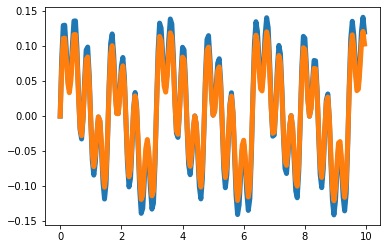

In [234]:
T = 200
t = np.arange(T)/T * 10
x = 0.1*np.sin(2*t)+0.2*np.sin(4*t)+0.1*np.sin(8*t)+0.2*np.sin(16*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
eps_y  = np.random.normal(size=T)*0
x = x*0.35
y = y*0.3
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}
_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1],[1,0]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [ ]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [ ]:
dataset_GConvLSTM = loader1.get_dataset(lags=1)

In [ ]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(100,120)))]]
dataset_miss_GConvLSTM = itstgcn.miss(dataset_GConvLSTM,mindex,mtype='block')

In [ ]:
dataset_padded_cubic_GConvLSTM = itstgcn.padding(dataset_miss_GConvLSTM,interpolation_method='cubic')

In [ ]:
lrnr_GConvLSTM = itstgcn.StgcnLearner(dataset_padded_cubic_GConvLSTM)

In [ ]:
lrnr_GConvLSTM.learn(filters=8,epoch=50,RecurrentGCN='GConvLSTM')

---

# import

In [1]:
import itstgcn 
import torch
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
class Eval_csy:
    def __init__(self,learner,train_dataset):
        self.learner = learner
        # self.learner.model.eval()
        try:self.learner.model.eval()
        except:pass
        self.train_dataset = train_dataset
        self.lags = self.learner.lags
        rslt_tr = self.learner(self.train_dataset) 
        self.X_tr = rslt_tr['X']
        self.y_tr = rslt_tr['y']
        self.f_tr = torch.concat([self.train_dataset[0].x.T,self.y_tr],axis=0).float()
        self.yhat_tr = rslt_tr['yhat']
        self.fhat_tr = torch.concat([self.train_dataset[0].x.T,self.yhat_tr],axis=0).float()

In [5]:
import pickle
import pandas as pd

In [6]:
def load_data(fname):
    with open(fname, 'rb') as outfile:
        data_dict = pickle.load(outfile)
    return data_dict

def save_data(data_dict,fname):
    with open(fname,'wb') as outfile:
        pickle.dump(data_dict,outfile)

In [7]:
from plotnine import *

# Example

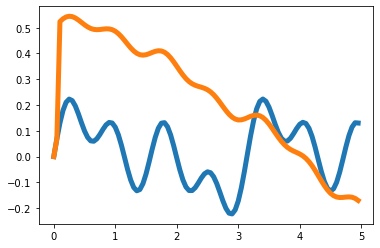

In [3072]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

save_data(data1, './data/toy_example_true1.csv')


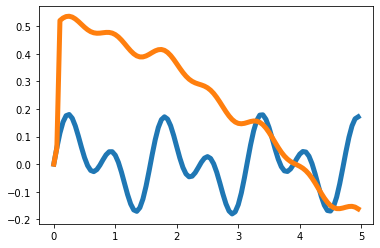

In [128]:
T = 100
t = np.arange(T)/T * 5

x = 0.01*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

save_data(data1, './data/toy_example_true1.csv')


In [3138]:
data_dict1 = itstgcn.load_data('./data/toy_example1.pkl')
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3139]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3140]:
dataset = loader1.get_dataset(lags=1)

In [3141]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,35)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3142]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [3143]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [3144]:
lrnr.learn(filters=1,epoch=5)

In [3145]:
evtor = Eval_csy(lrnr,dataset_padded)

In [3146]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [3147]:
lrnr_2.learn(filters=1,epoch=5)

In [3148]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

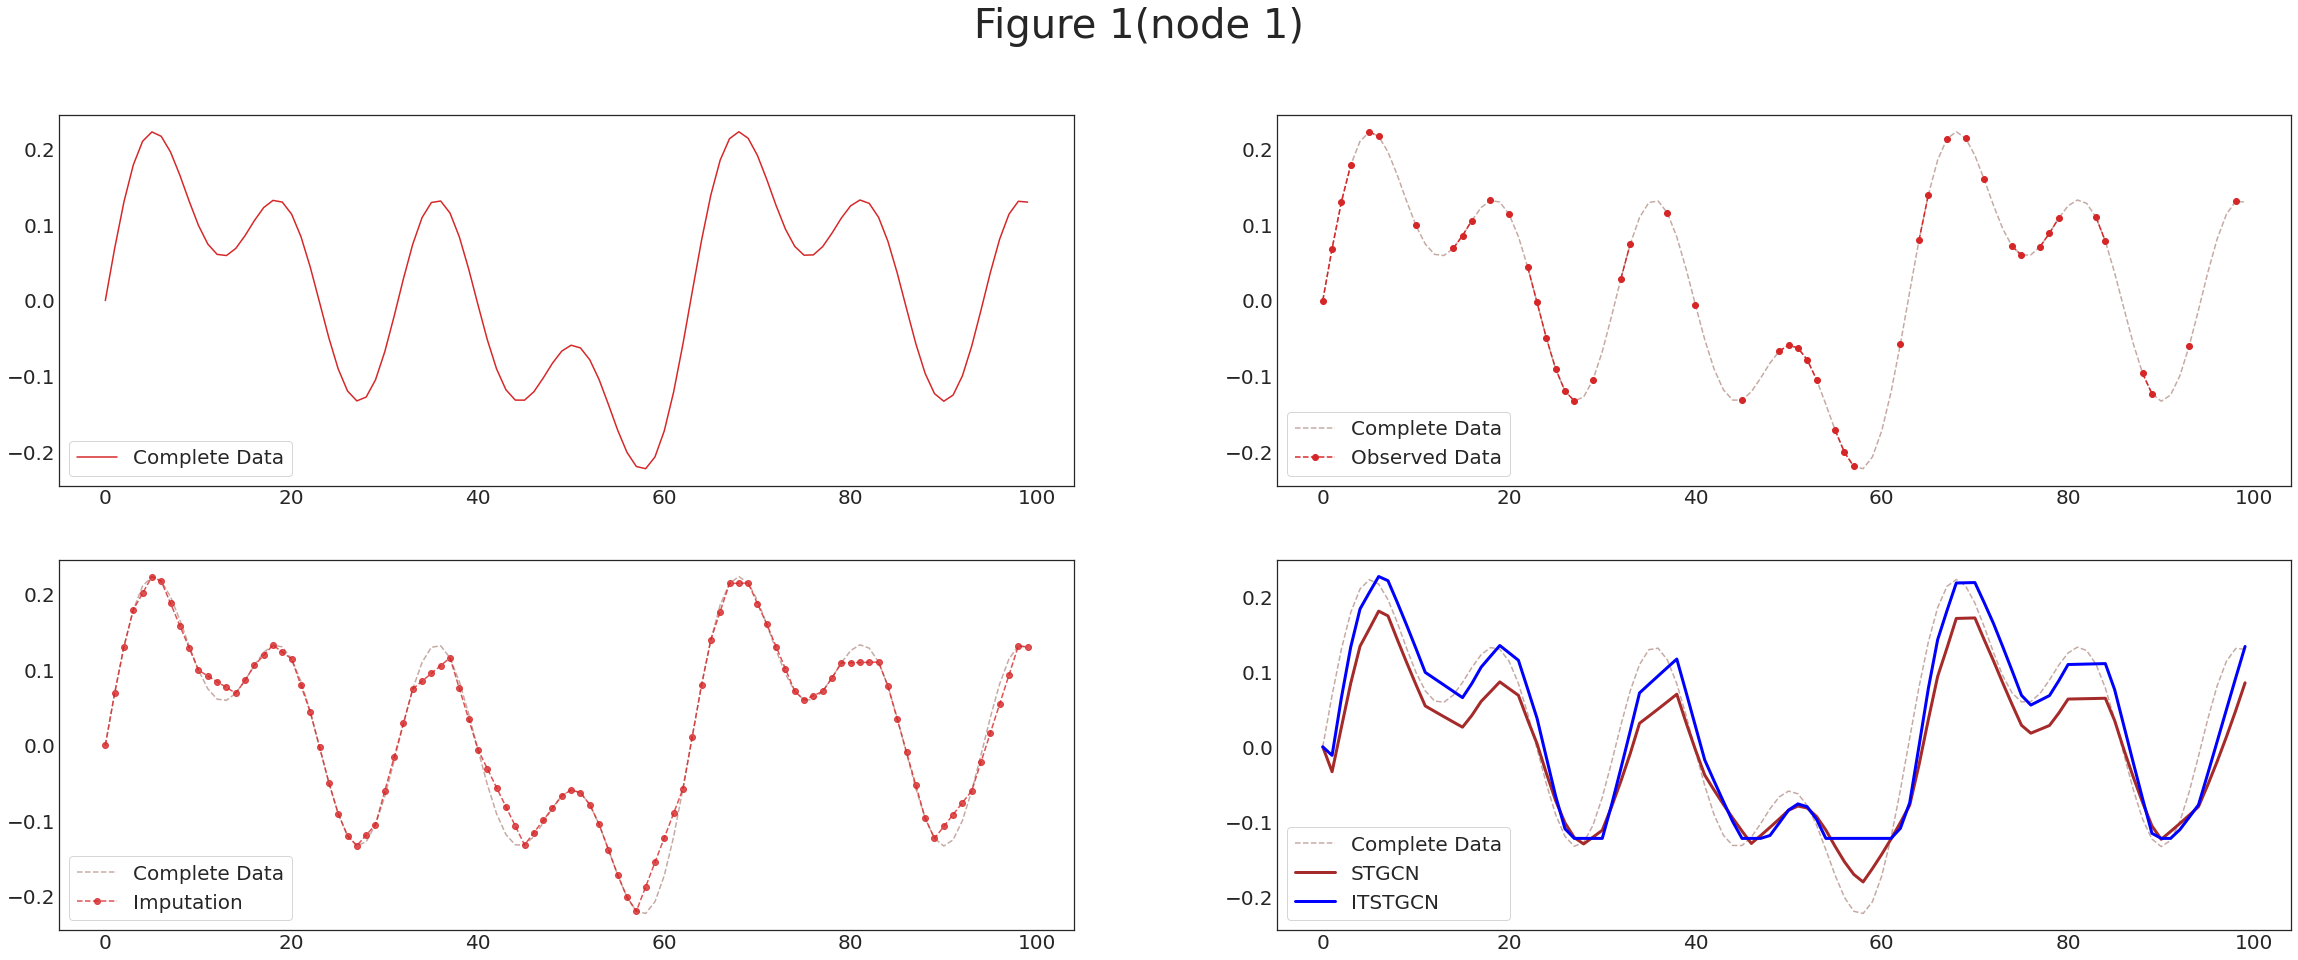

In [3149]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,0],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

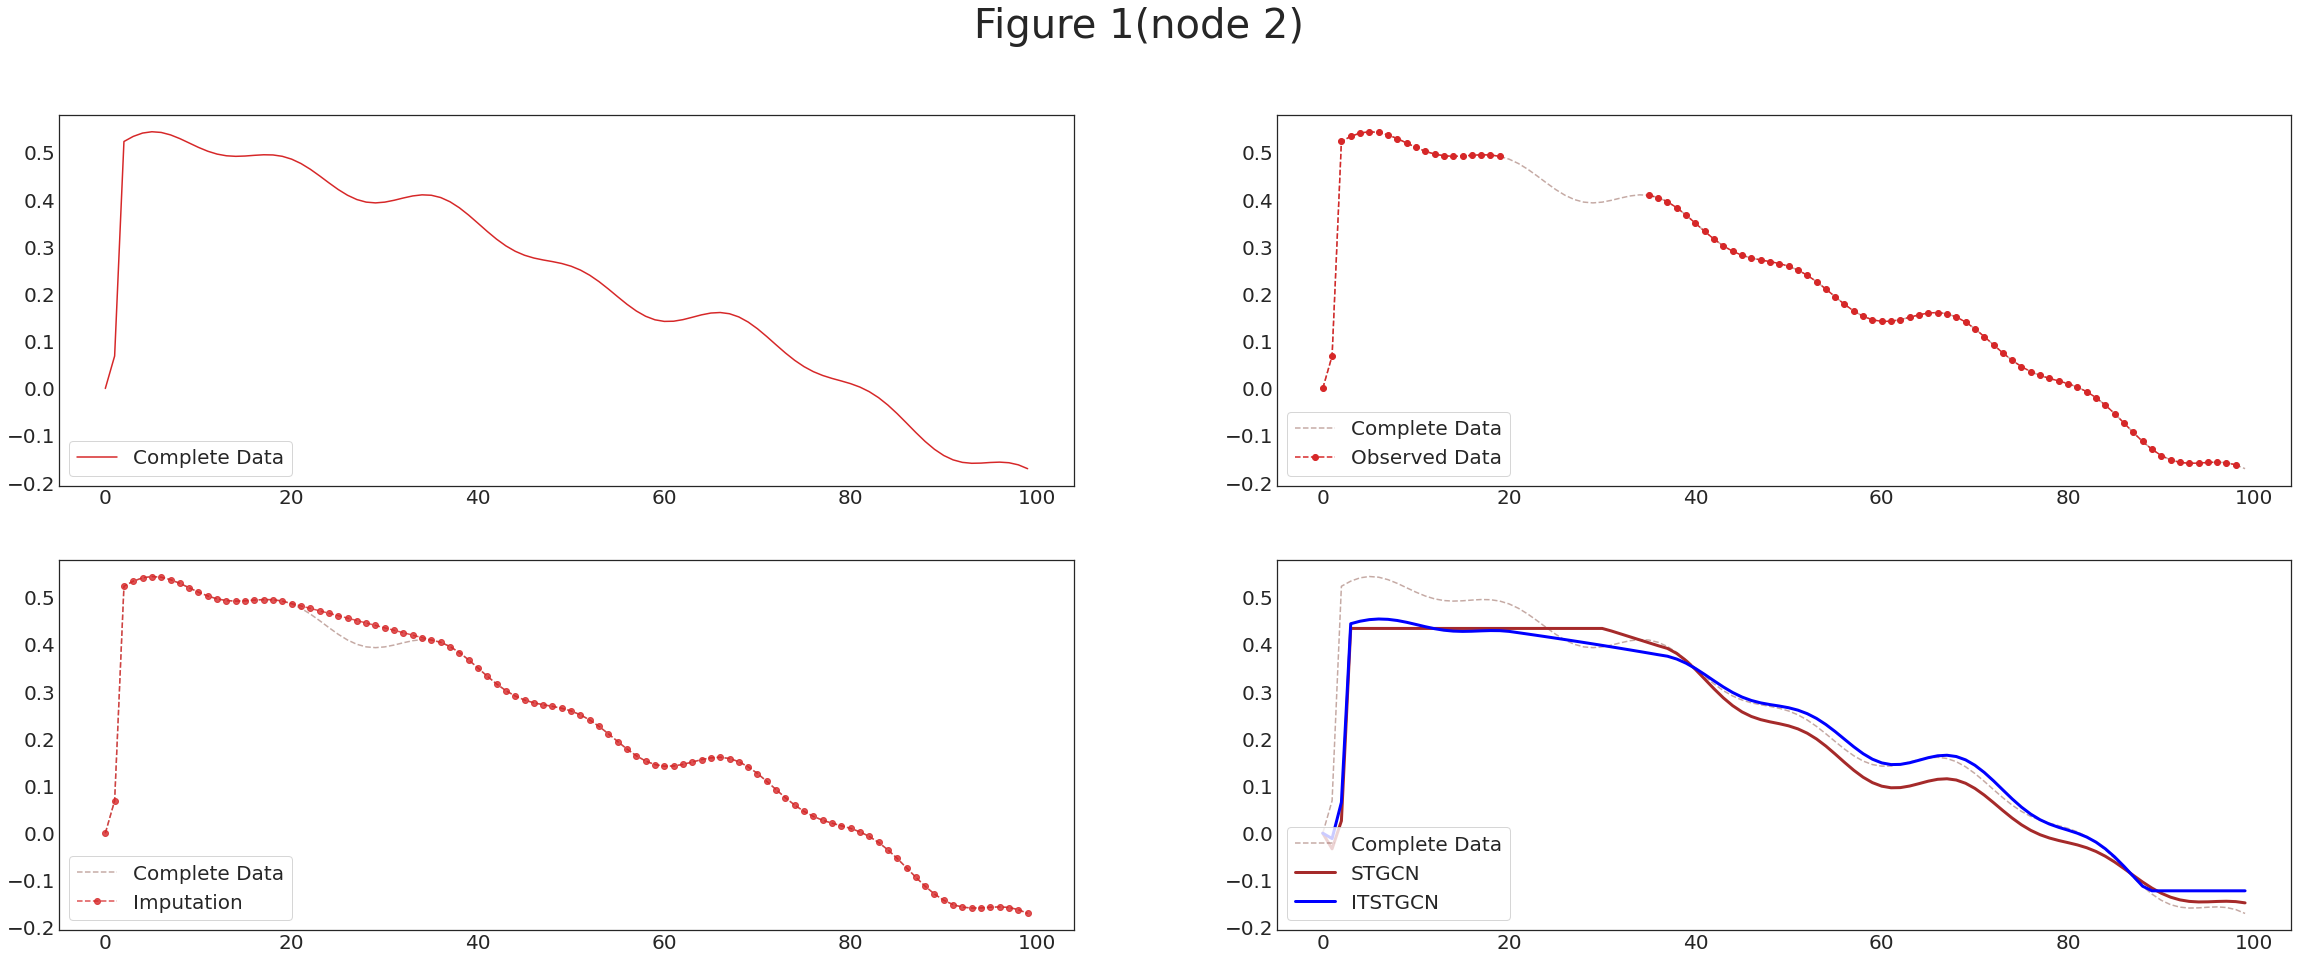

In [3150]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,1],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot((mindex[1][0][0]+mindex[1][0][len(mindex[1][0])-1])/2, 0.1,'s', markersize=110, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

# Add

In [21]:
import itstgcntry

# GConvGRU_random,block

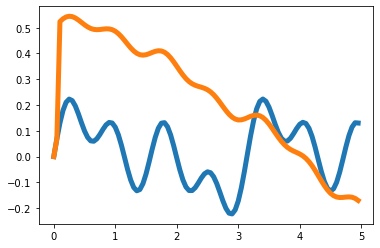

In [3151]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [2212]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [2213]:
dataset = loader1.get_dataset(lags=1)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [2214]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [2215]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [2216]:
lrnr_GConvGRU = itstgcntry.StgcnLearner(dataset_padded)

In [2217]:
model_GConvGRU = itstgcntry.GConvGRU_RecurrentGCN(dataset_padded,filters=2)

In [2218]:
lrnr_GConvGRU.learn(model_GConvGRU,epoch=5)

In [2219]:
lrnr_GConvGRU1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [2220]:
model_GConvGRU1 = itstgcntry.GConvGRU_RecurrentGCN(dataset_padded,filters=2)

In [2221]:
lrnr_GConvGRU1.learn(model_GConvGRU1,epoch=5)

In [2222]:
evtor_GConvGRU = Eval_csy(lrnr_GConvGRU,dataset_padded)

In [2223]:
evtor_GConvGRU1 = Eval_csy(lrnr_GConvGRU1,dataset_padded)

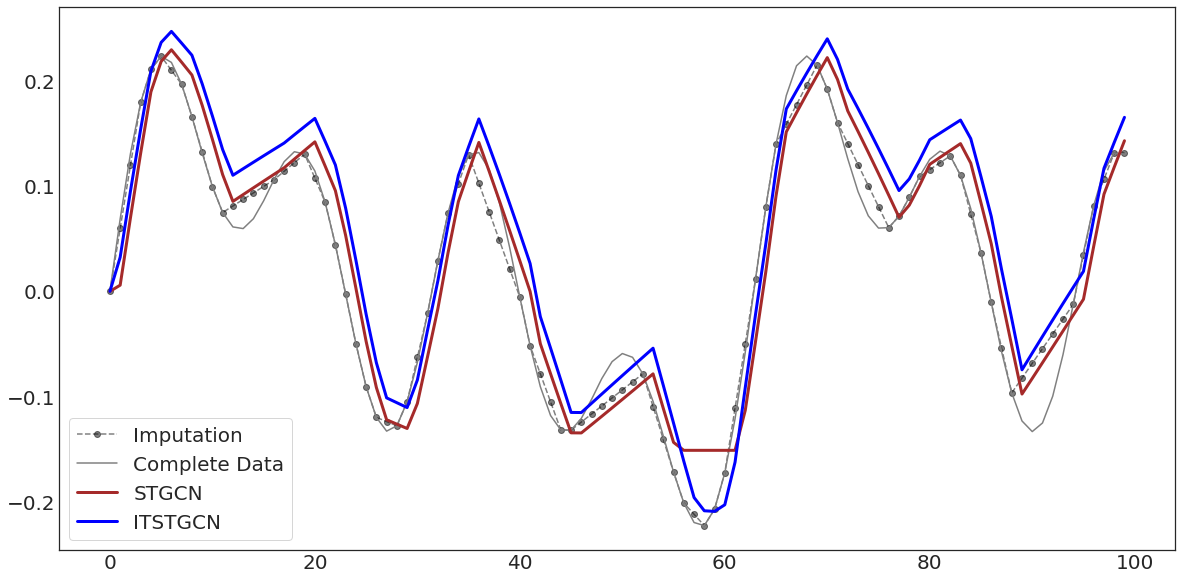

In [2224]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

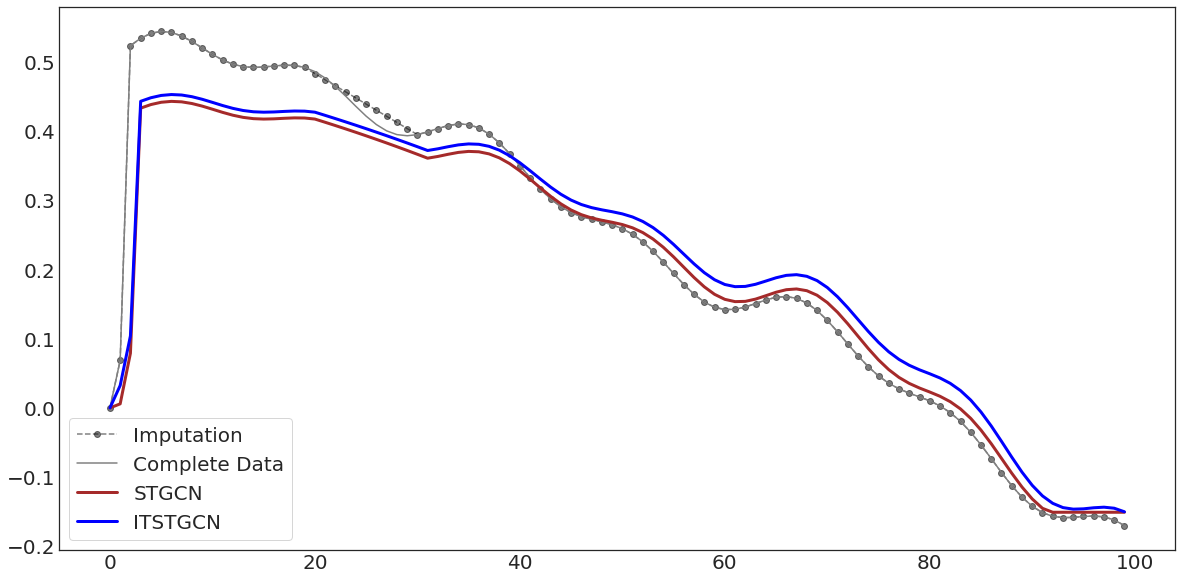

In [2225]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

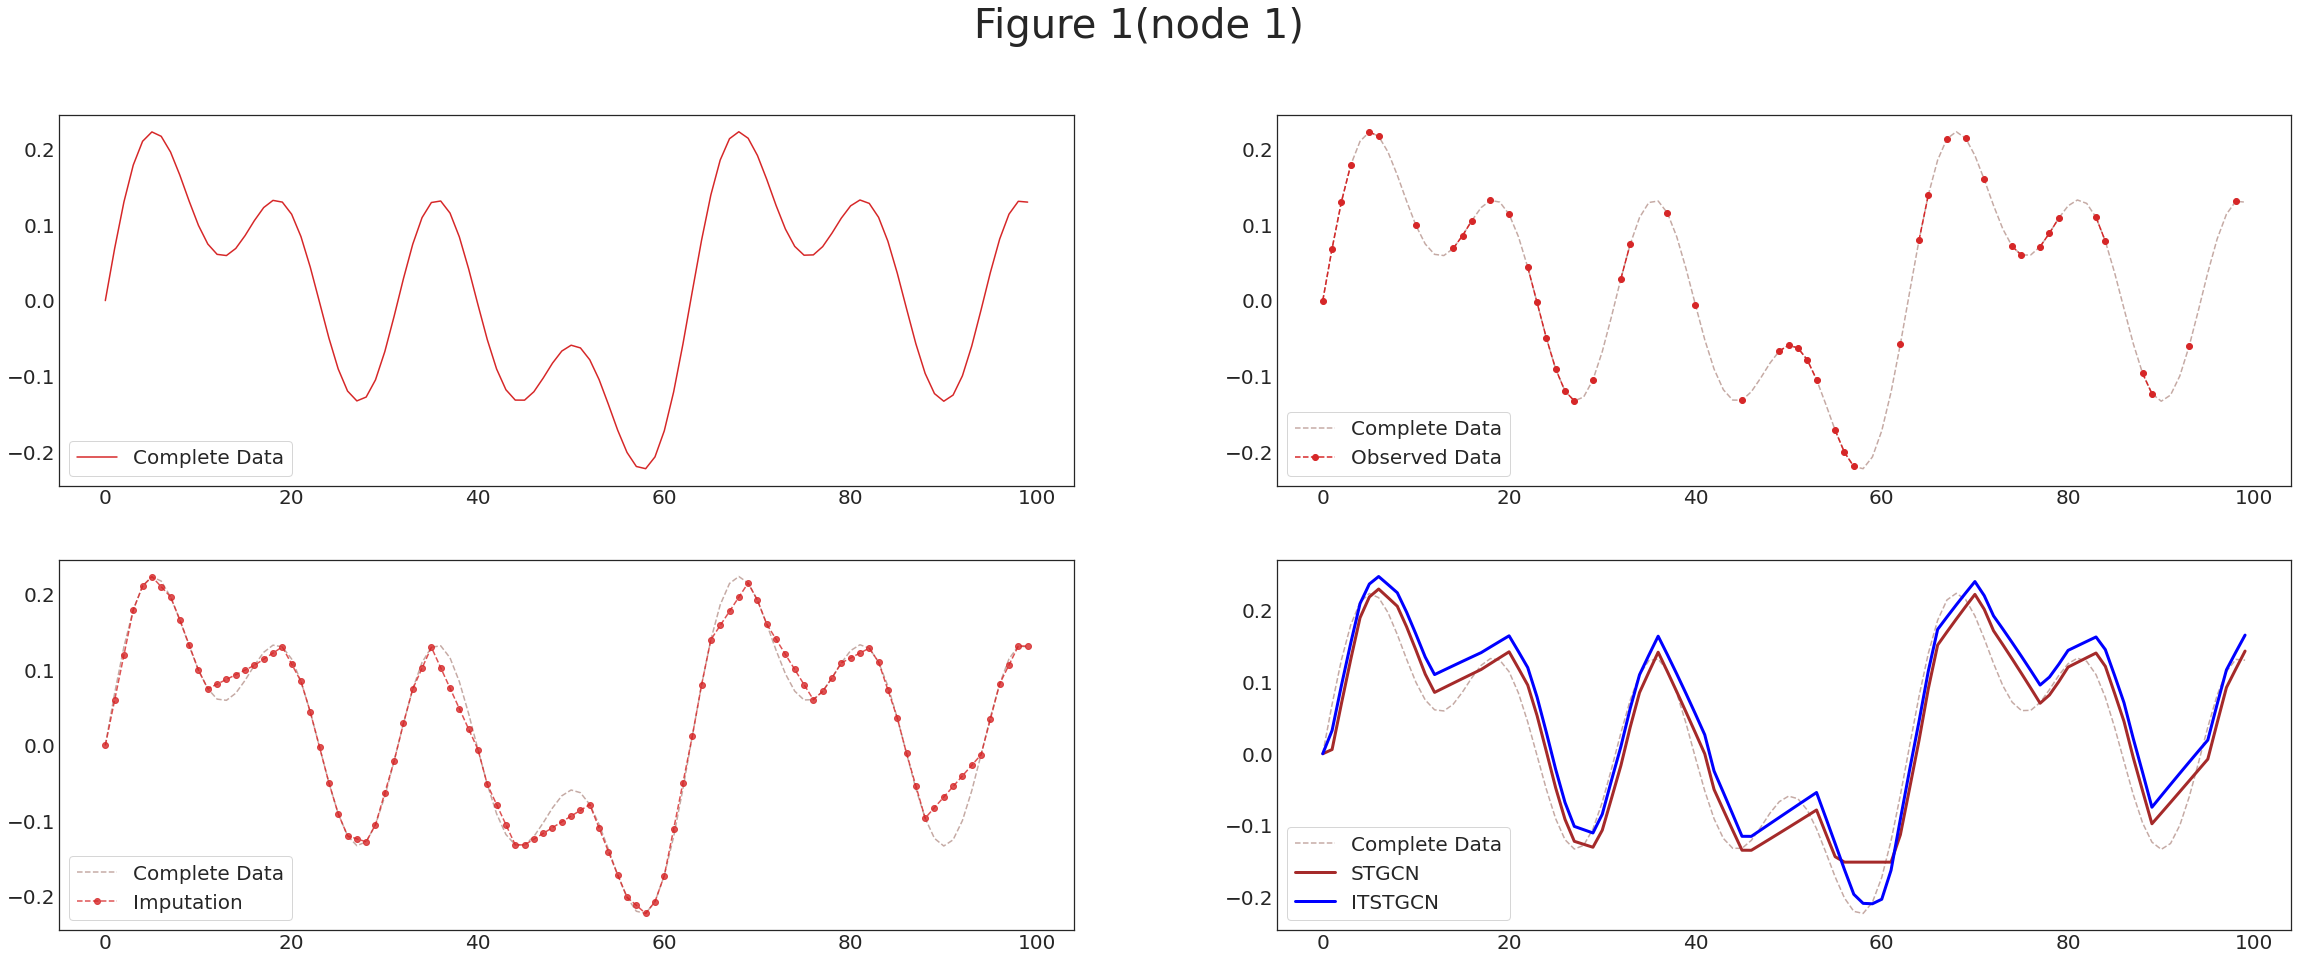

In [3152]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,0],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_GConvGRU.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor_GConvGRU.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_GConvGRU1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(58, -0.15, 'o', markersize=120, markerfacecolor='none', markeredgecolor='red',markeredgewidth=2)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

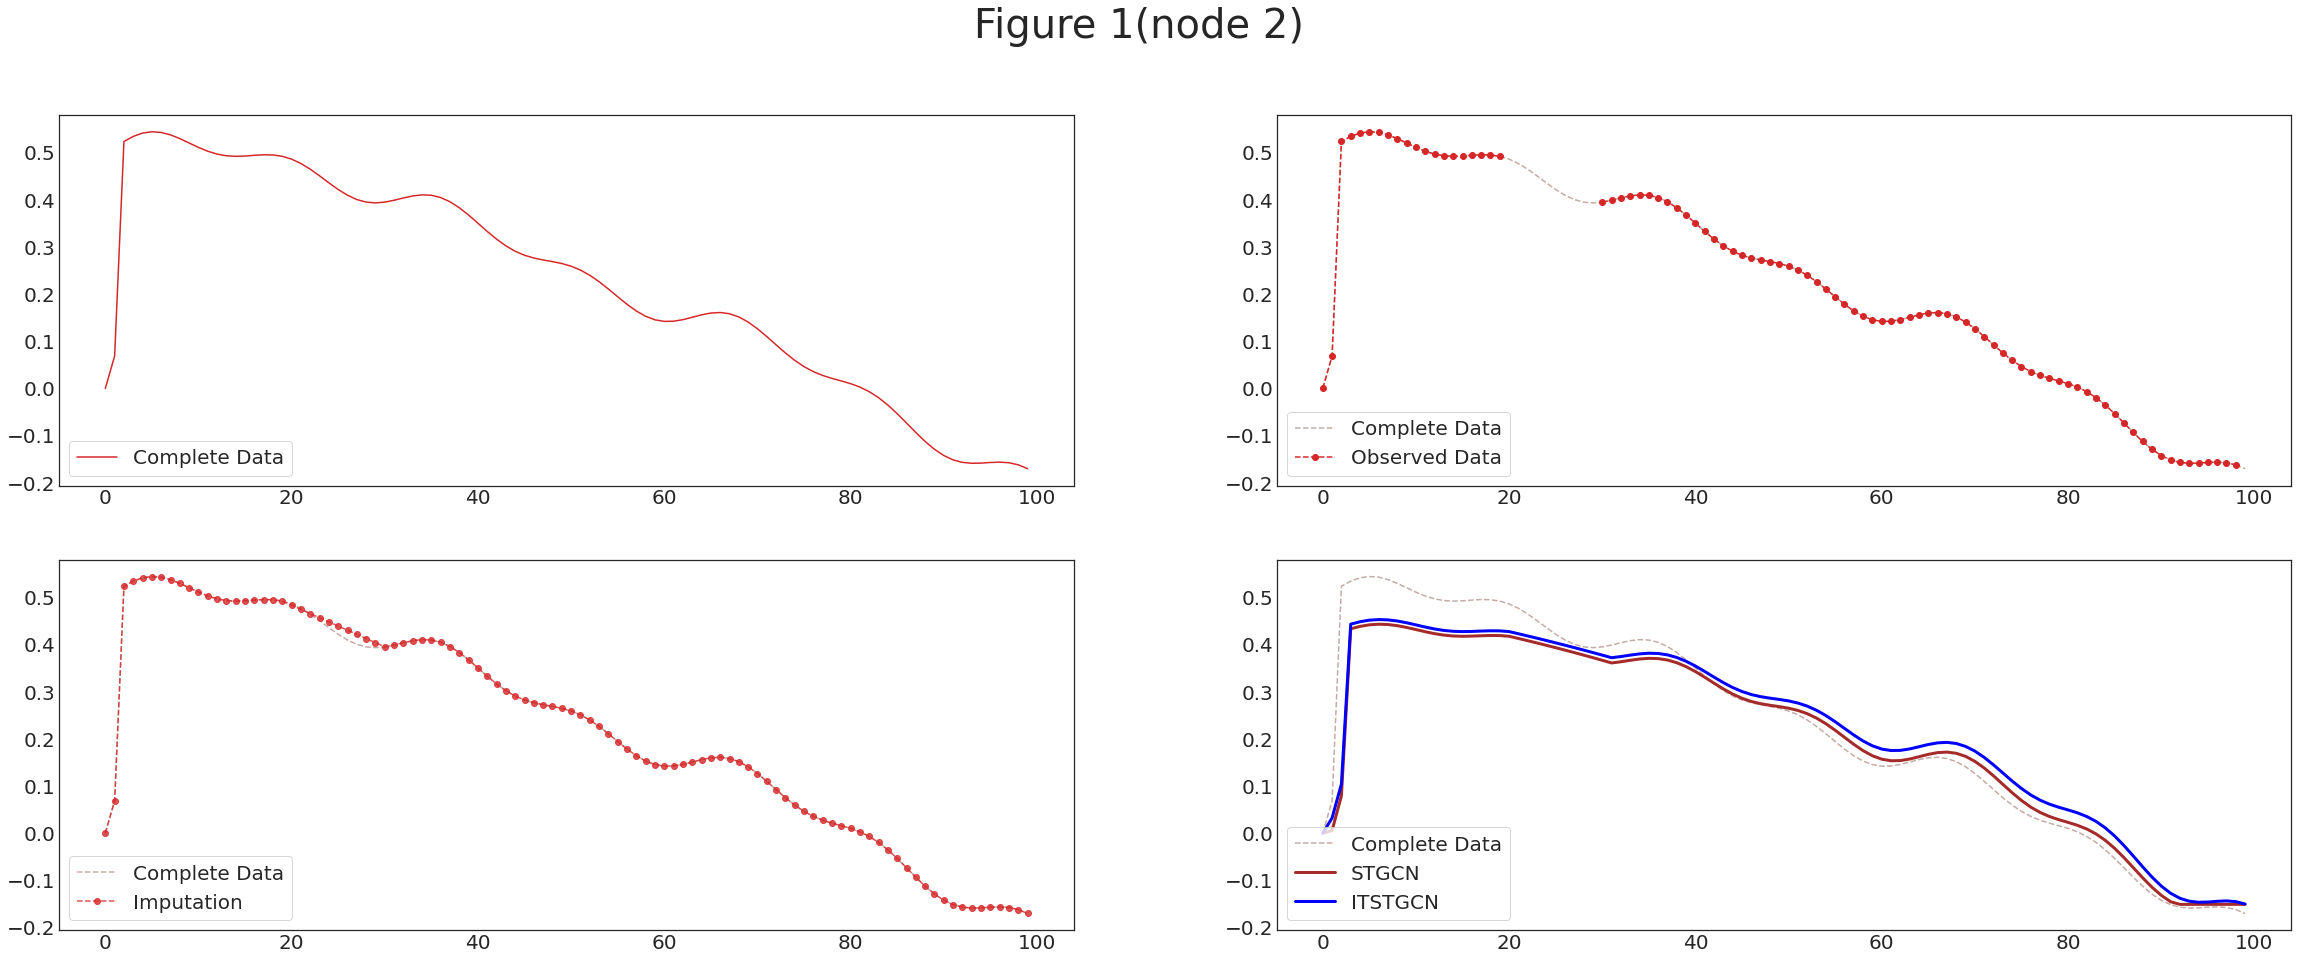

In [2238]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,1],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_GConvGRU.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor_GConvGRU.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_GConvGRU1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot((mindex[1][0][0]+mindex[1][0][len(mindex[1][0])-1])/2, 0.1,'s', markersize=110, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

# GConvGRU_random,random

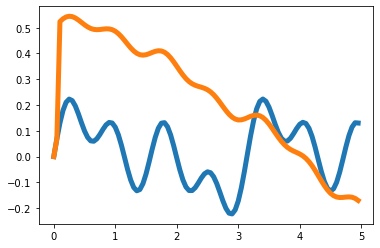

In [2706]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [2723]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [2724]:
dataset = loader1.get_dataset(lags=1)

In [2739]:
mindex = itstgcn.rand_mindex(dataset,mrate=0.4)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [2740]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [2741]:
lrnr_GConvGRU3 = itstgcntry.StgcnLearner(dataset_padded)

In [2742]:
model_GConvGRU3 = itstgcntry.GConvGRU_RecurrentGCN(dataset_padded,filters=2)

In [2743]:
lrnr_GConvGRU3.learn(model_GConvGRU3,epoch=5)

In [2744]:
lrnr_GConvGRU4 = itstgcntry.ITStgcnLearner(dataset_padded)

In [2745]:
model_GConvGRU4 = itstgcntry.GConvGRU_RecurrentGCN(dataset_padded,filters=2)

In [2746]:
lrnr_GConvGRU4.learn(model_GConvGRU4,epoch=5)

In [2747]:
evtor_GConvGRU3 = Eval_csy(lrnr_GConvGRU3,dataset_padded)

In [2748]:
evtor_GConvGRU4 = Eval_csy(lrnr_GConvGRU4,dataset_padded)

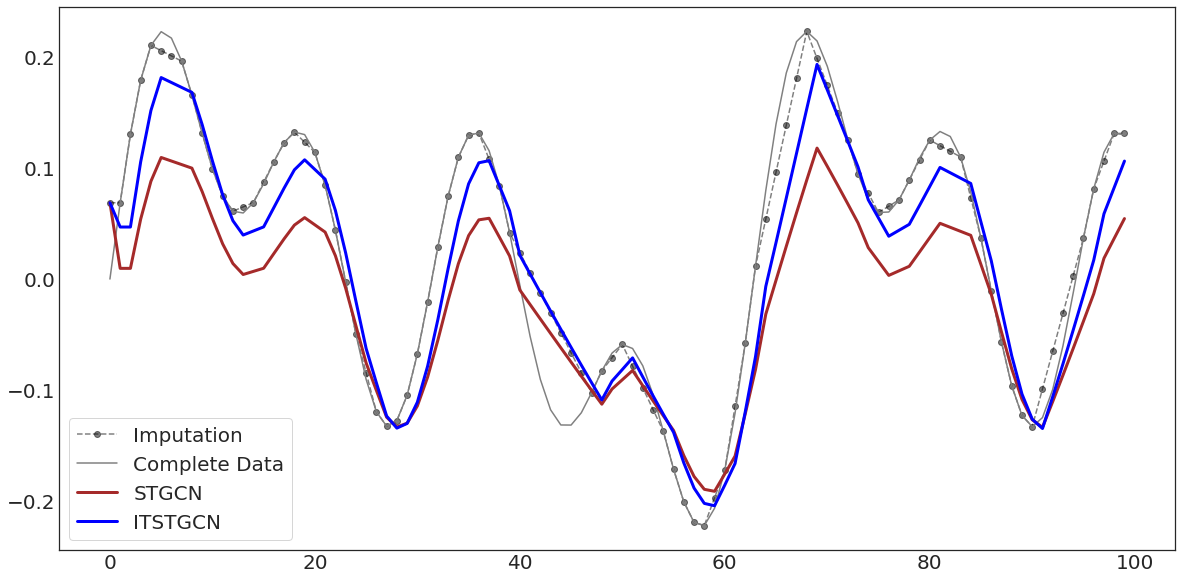

In [2749]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU3.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU3.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU4.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

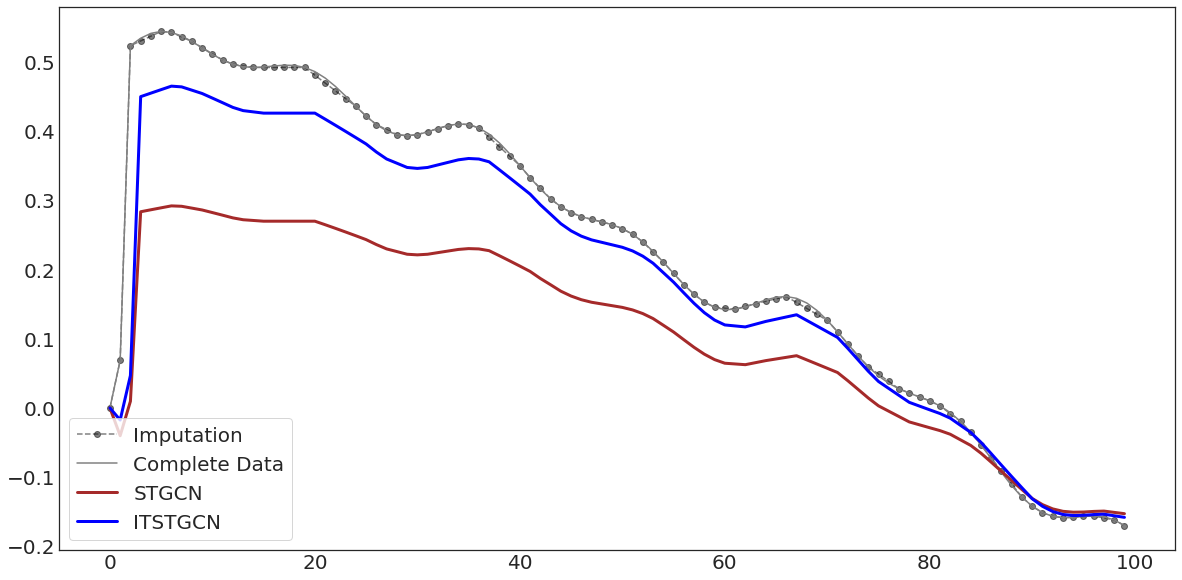

In [2750]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU3.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU3.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU4.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

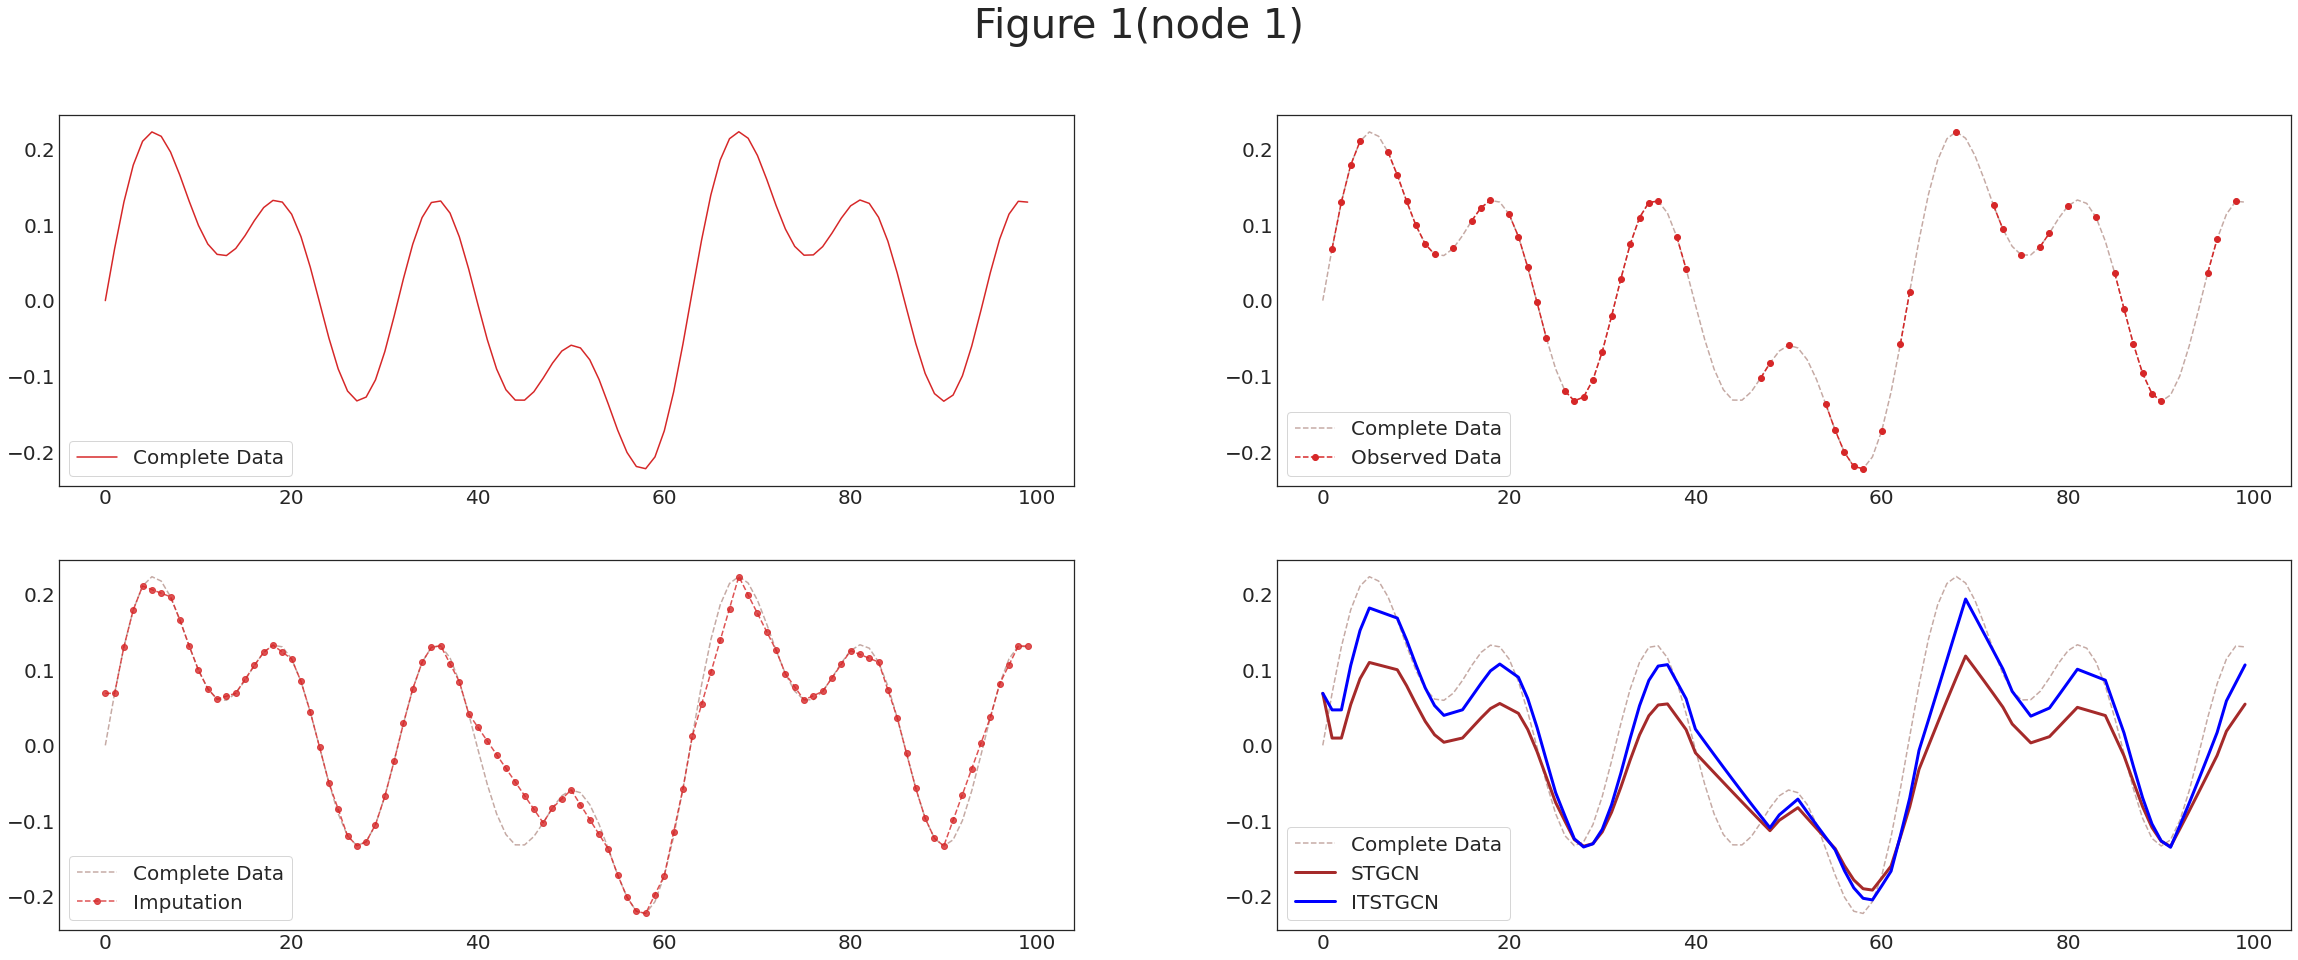

In [2751]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,0],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_GConvGRU3.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor_GConvGRU3.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_GConvGRU4.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(58, -0.15, 'o', markersize=120, markerfacecolor='none', markeredgecolor='red',markeredgewidth=2)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

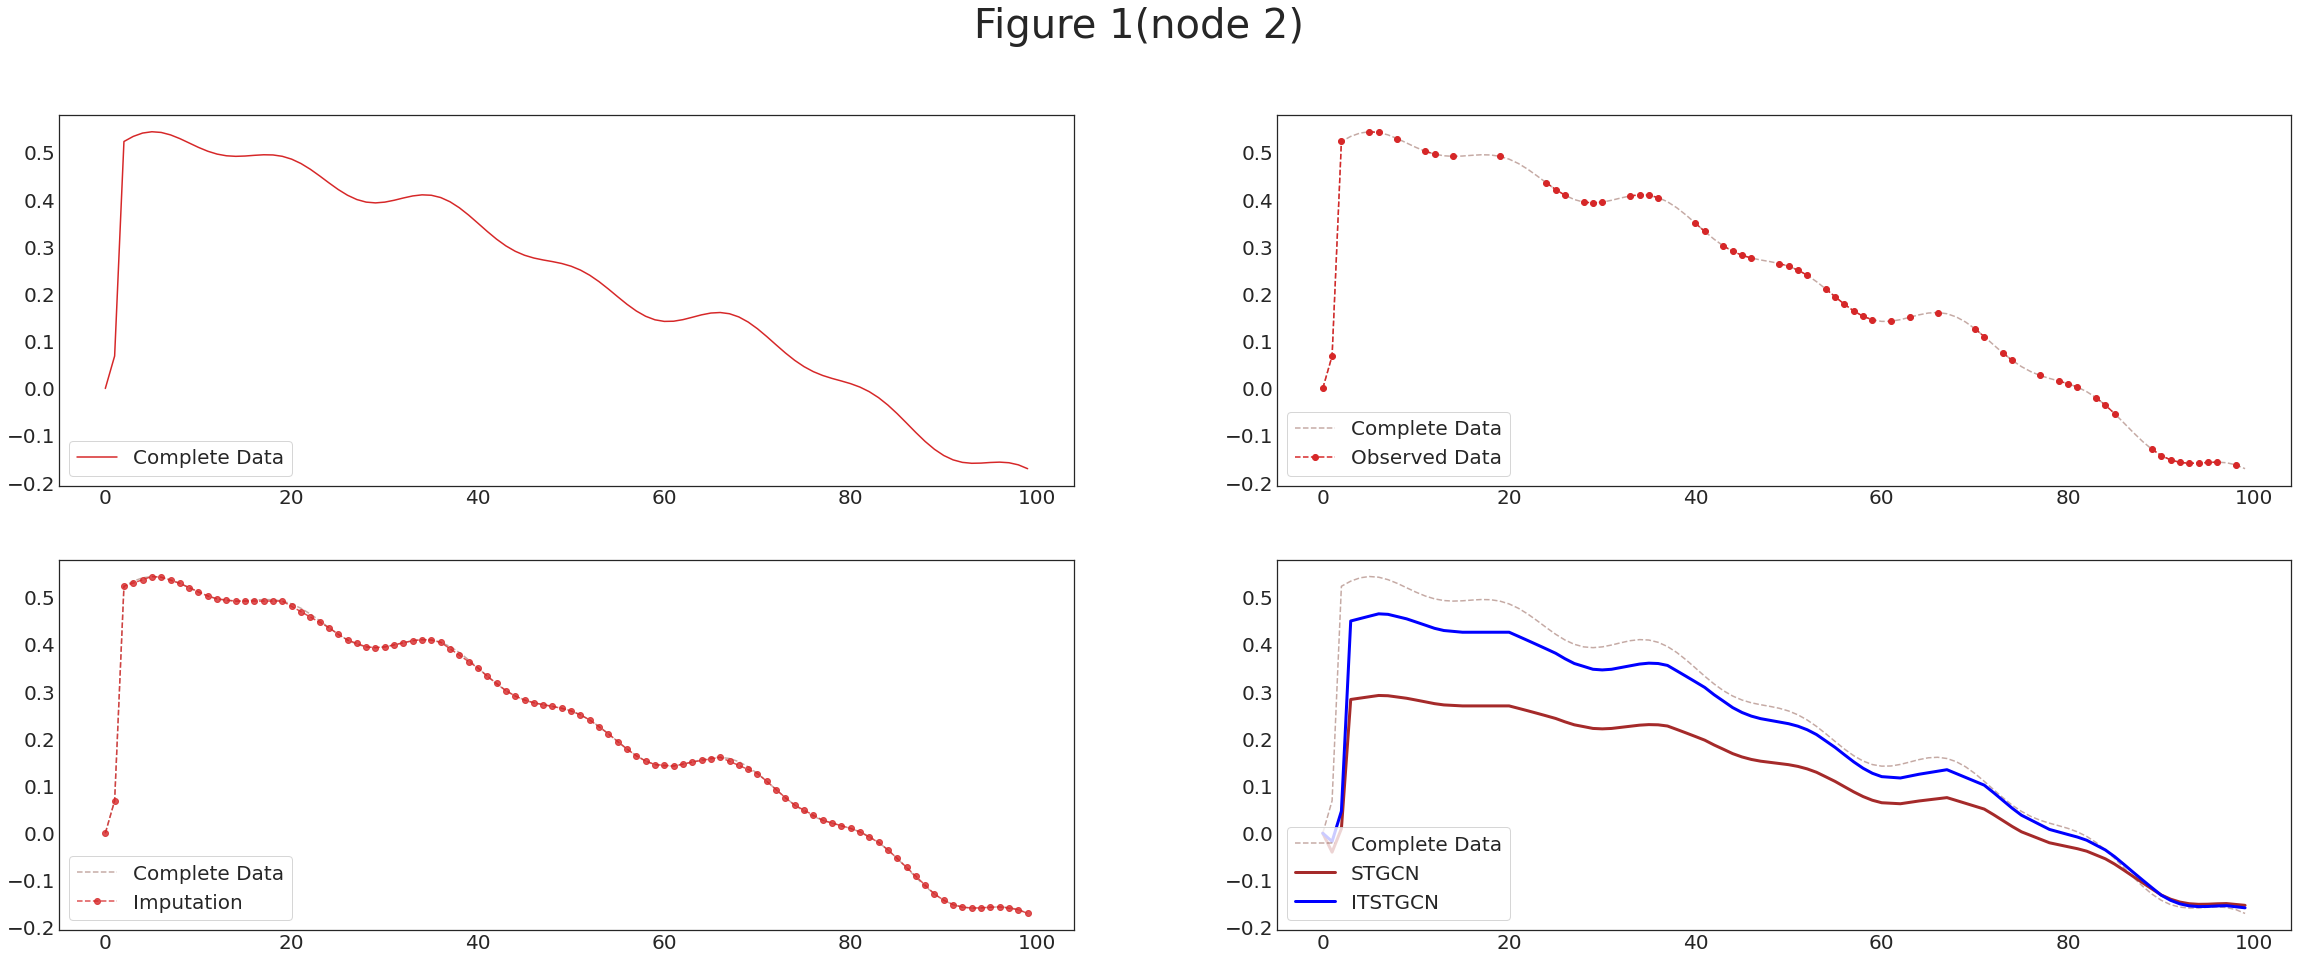

In [2752]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,1],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_GConvGRU3.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor_GConvGRU3.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_GConvGRU4.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot((mindex[1][0][0]+mindex[1][0][len(mindex[1][0])-1])/2, 0.1,'s', markersize=110, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

# GConvGRU_block,block

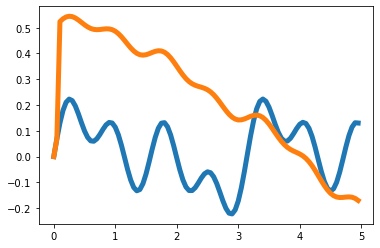

In [2495]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [2497]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [2518]:
dataset = loader1.get_dataset(lags=1)

In [2576]:
mindex = [[np.array(list(range(40,50)))],[np.array(list(range(20,45)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [2577]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [2578]:
lrnr_GConvGRU5 = itstgcntry.StgcnLearner(dataset_padded)

In [2579]:
model_GConvGRU5 = itstgcntry.GConvGRU_RecurrentGCN(dataset_padded,filters=2)

In [2580]:
lrnr_GConvGRU5.learn(model_GConvGRU5,epoch=5)

In [2581]:
lrnr_GConvGRU6 = itstgcntry.ITStgcnLearner(dataset_padded)

In [2582]:
model_GConvGRU6 = itstgcntry.GConvGRU_RecurrentGCN(dataset_padded,filters=2)

In [2583]:
lrnr_GConvGRU6.learn(model_GConvGRU6,epoch=5)

In [2584]:
evtor_GConvGRU5 = Eval_csy(lrnr_GConvGRU5,dataset_padded)

In [2585]:
evtor_GConvGRU6 = Eval_csy(lrnr_GConvGRU6,dataset_padded)

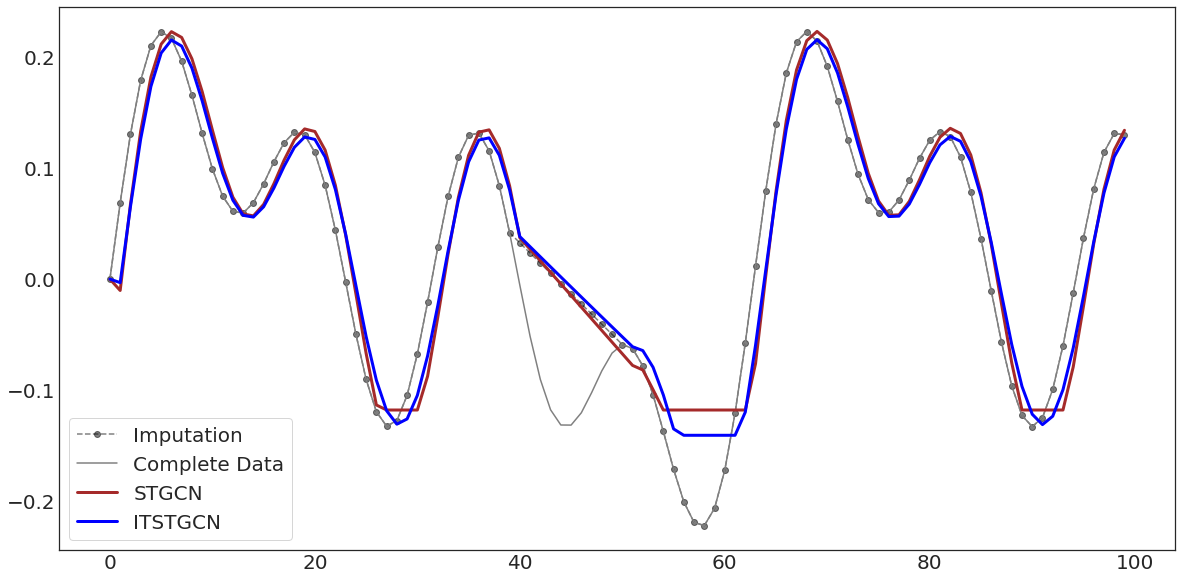

In [2586]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU5.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU5.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU6.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

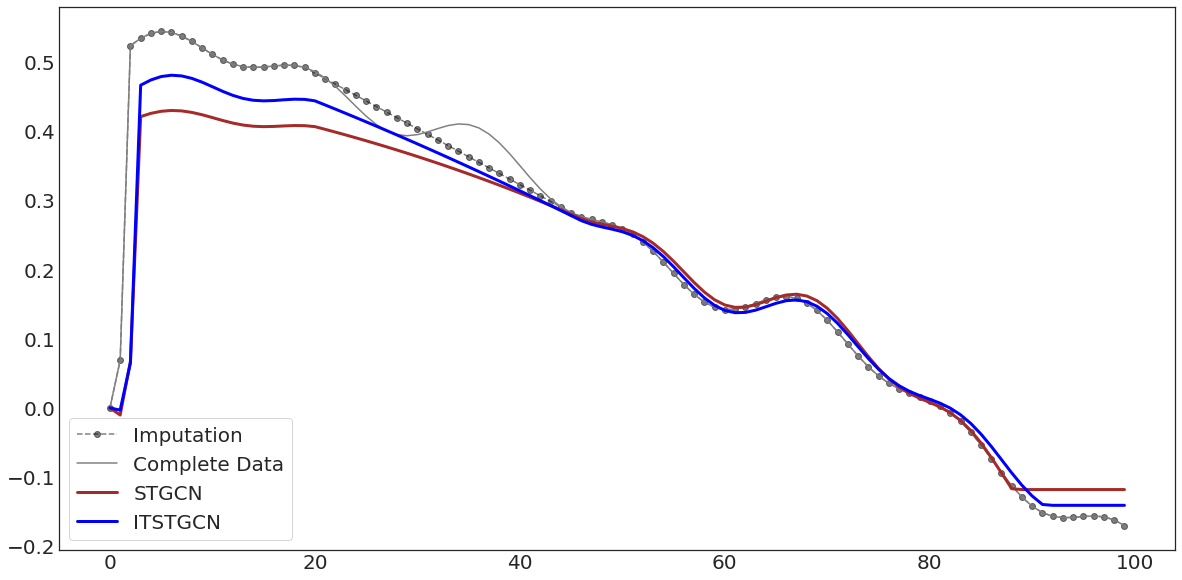

In [2587]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU5.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU5.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU6.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

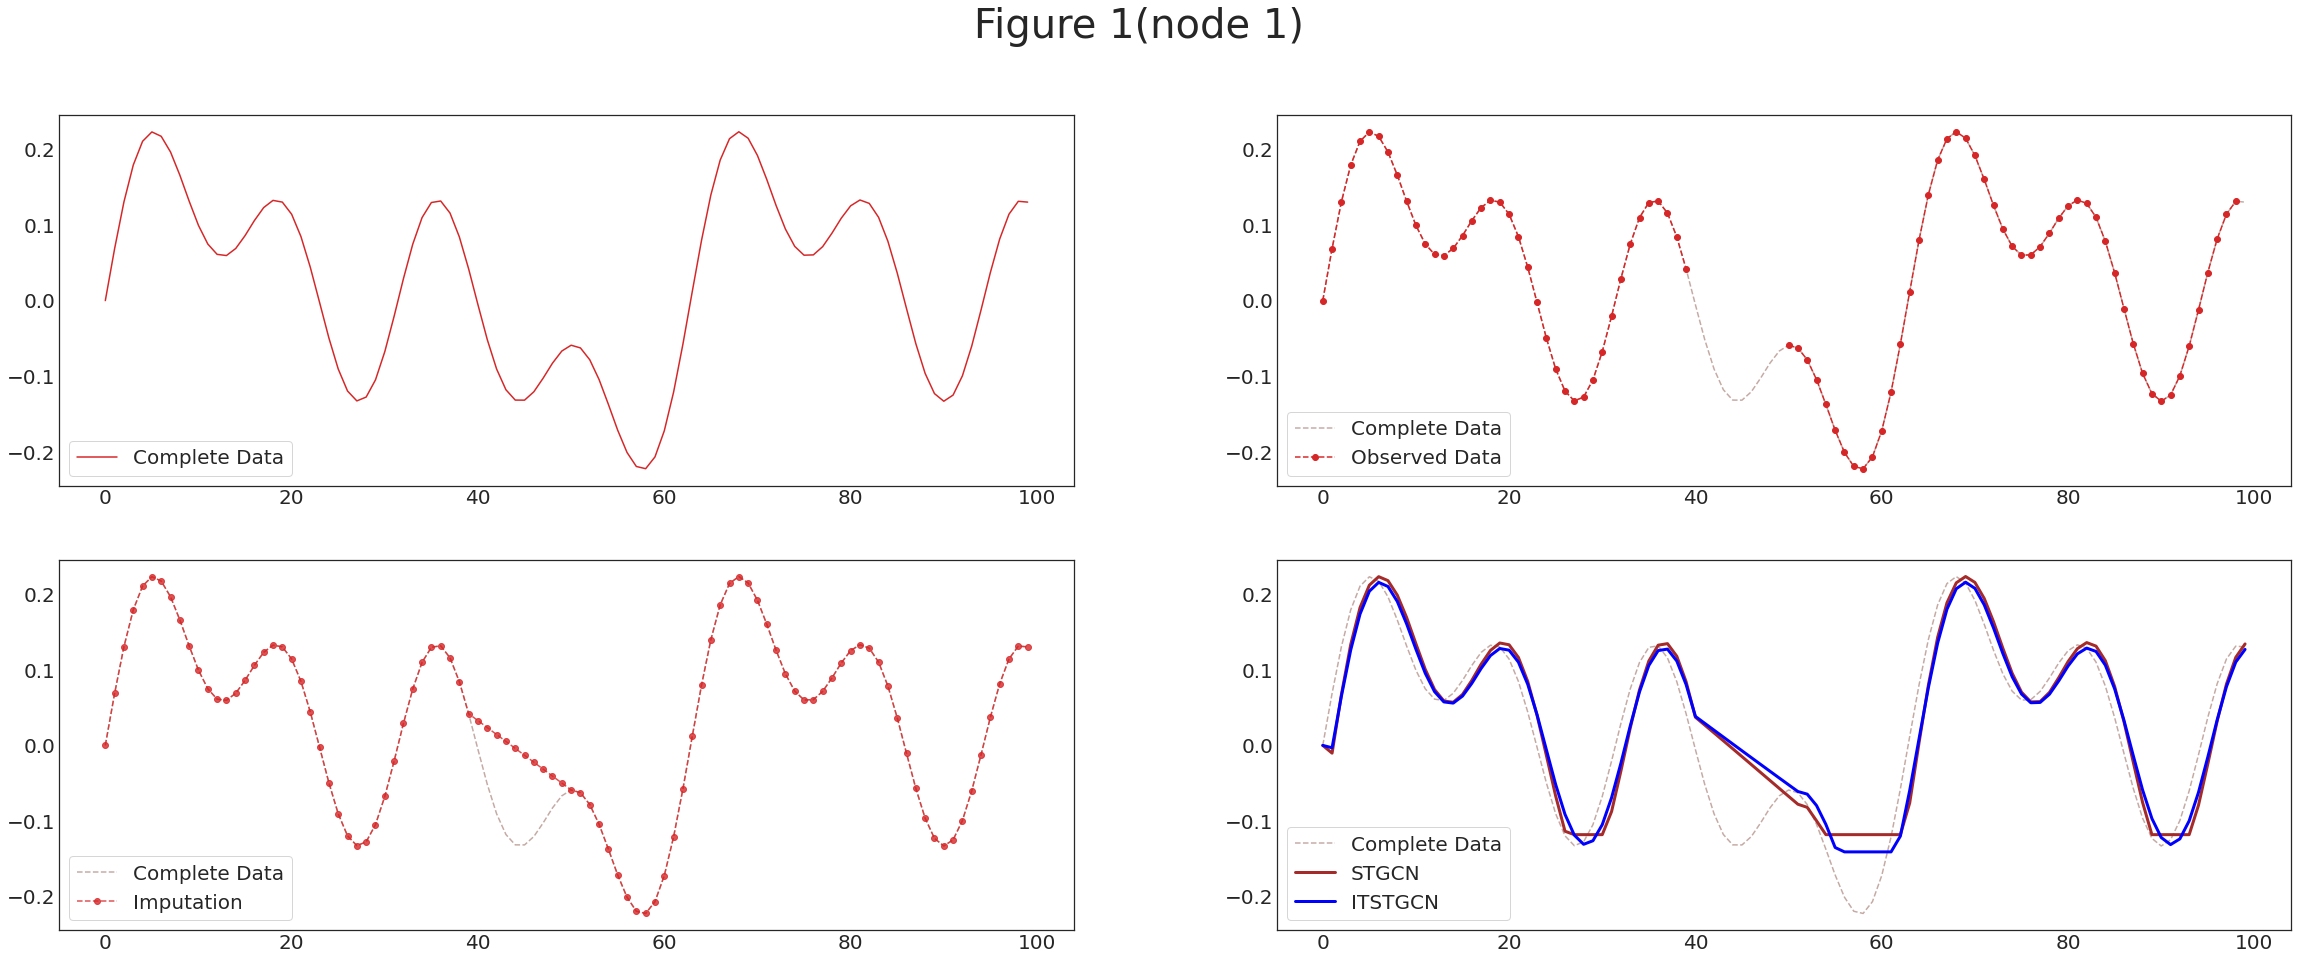

In [2588]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,0],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_GConvGRU5.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor_GConvGRU5.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_GConvGRU6.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(58, -0.15, 'o', markersize=120, markerfacecolor='none', markeredgecolor='red',markeredgewidth=2)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

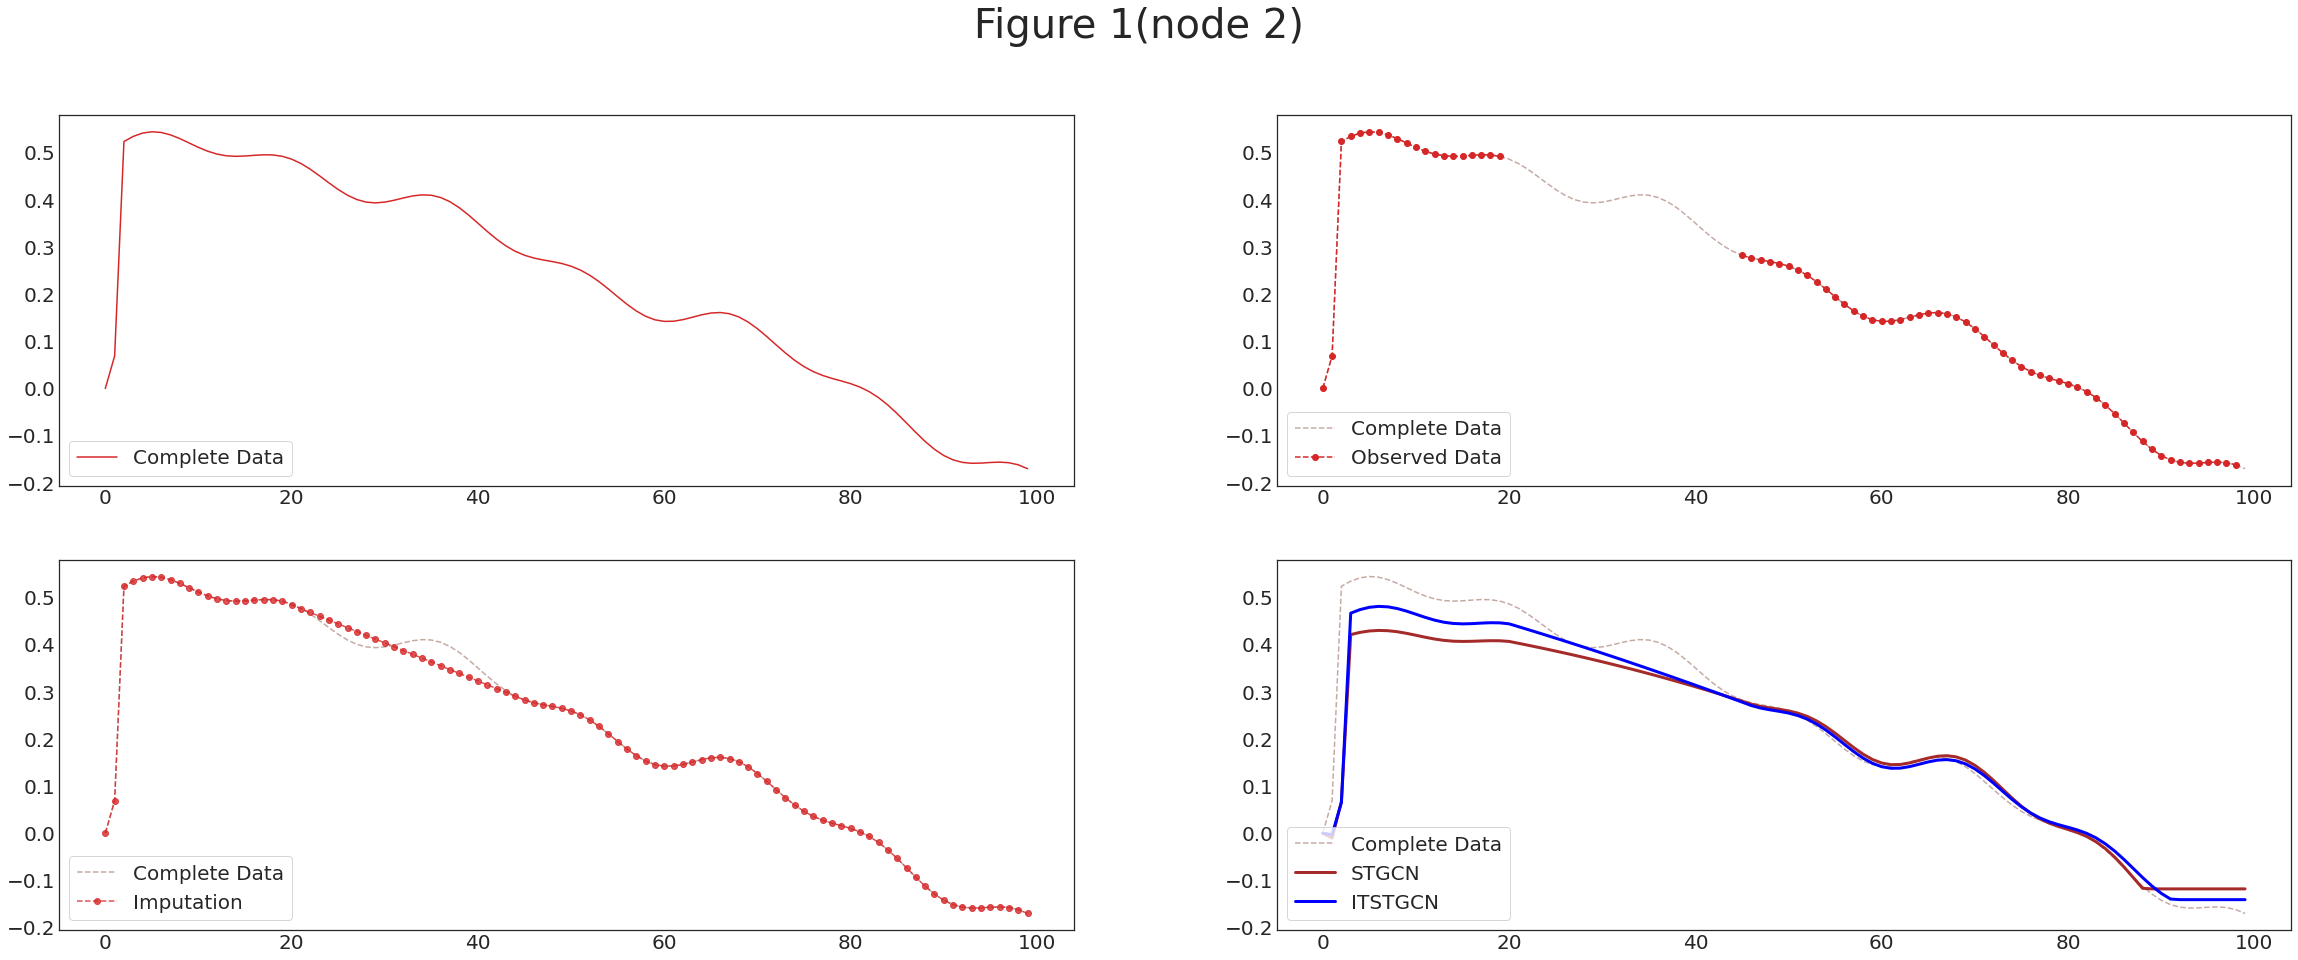

In [2589]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,1],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_GConvGRU5.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor_GConvGRU5.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_GConvGRU6.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot((mindex[1][0][0]+mindex[1][0][len(mindex[1][0])-1])/2, 0.1,'s', markersize=110, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

# GConvGRU_block,random

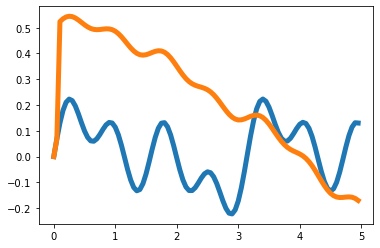

In [2618]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [2619]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [2620]:
dataset = loader1.get_dataset(lags=1)

In [2691]:
mindex = [[np.array(list(range(50,60)))],random.sample(range(0, T), int(T*0.5))]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [2692]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [2693]:
lrnr_GConvGRU7 = itstgcntry.StgcnLearner(dataset_padded)

In [2694]:
model_GConvGRU7 = itstgcntry.GConvGRU_RecurrentGCN(dataset_padded,filters=2)

In [2695]:
lrnr_GConvGRU7.learn(model_GConvGRU7,epoch=10)

In [2696]:
lrnr_GConvGRU8 = itstgcntry.ITStgcnLearner(dataset_padded)

In [2697]:
model_GConvGRU8 = itstgcntry.GConvGRU_RecurrentGCN(dataset_padded,filters=2)

In [2698]:
lrnr_GConvGRU8.learn(model_GConvGRU8,epoch=10)

In [2699]:
evtor_GConvGRU7 = Eval_csy(lrnr_GConvGRU7,dataset_padded)

In [2700]:
evtor_GConvGRU8 = Eval_csy(lrnr_GConvGRU8,dataset_padded)

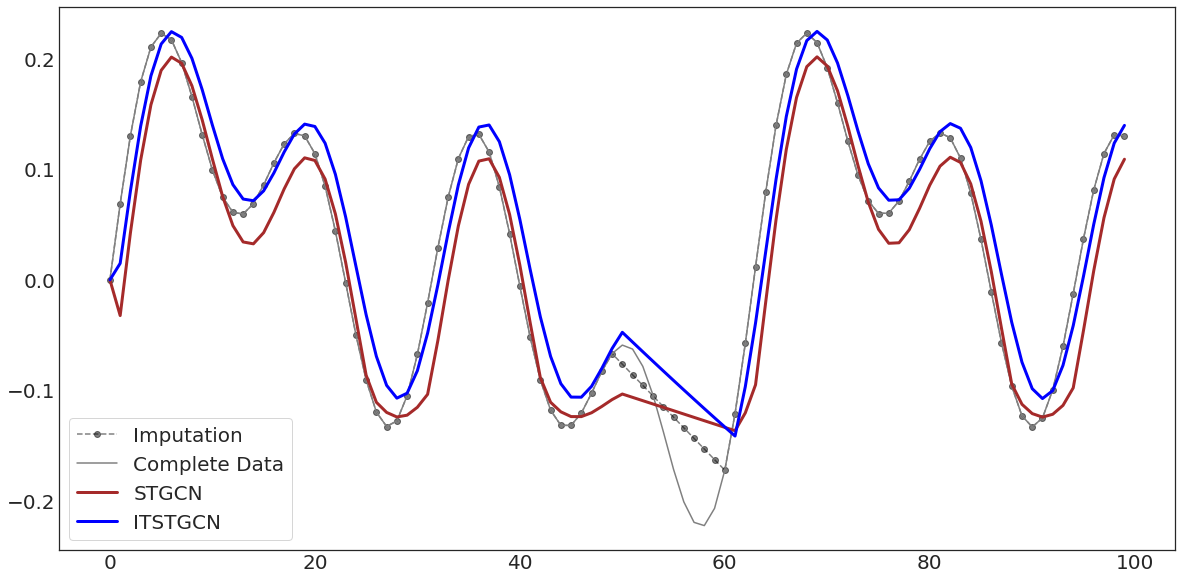

In [2701]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU7.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU7.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU8.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

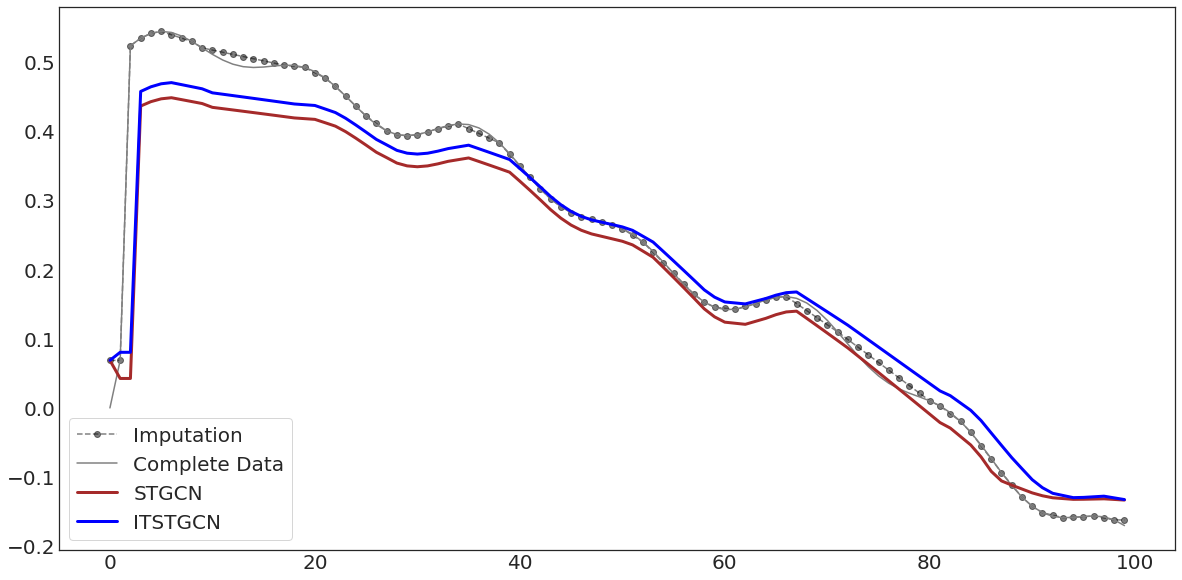

In [2702]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU7.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU7.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU8.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

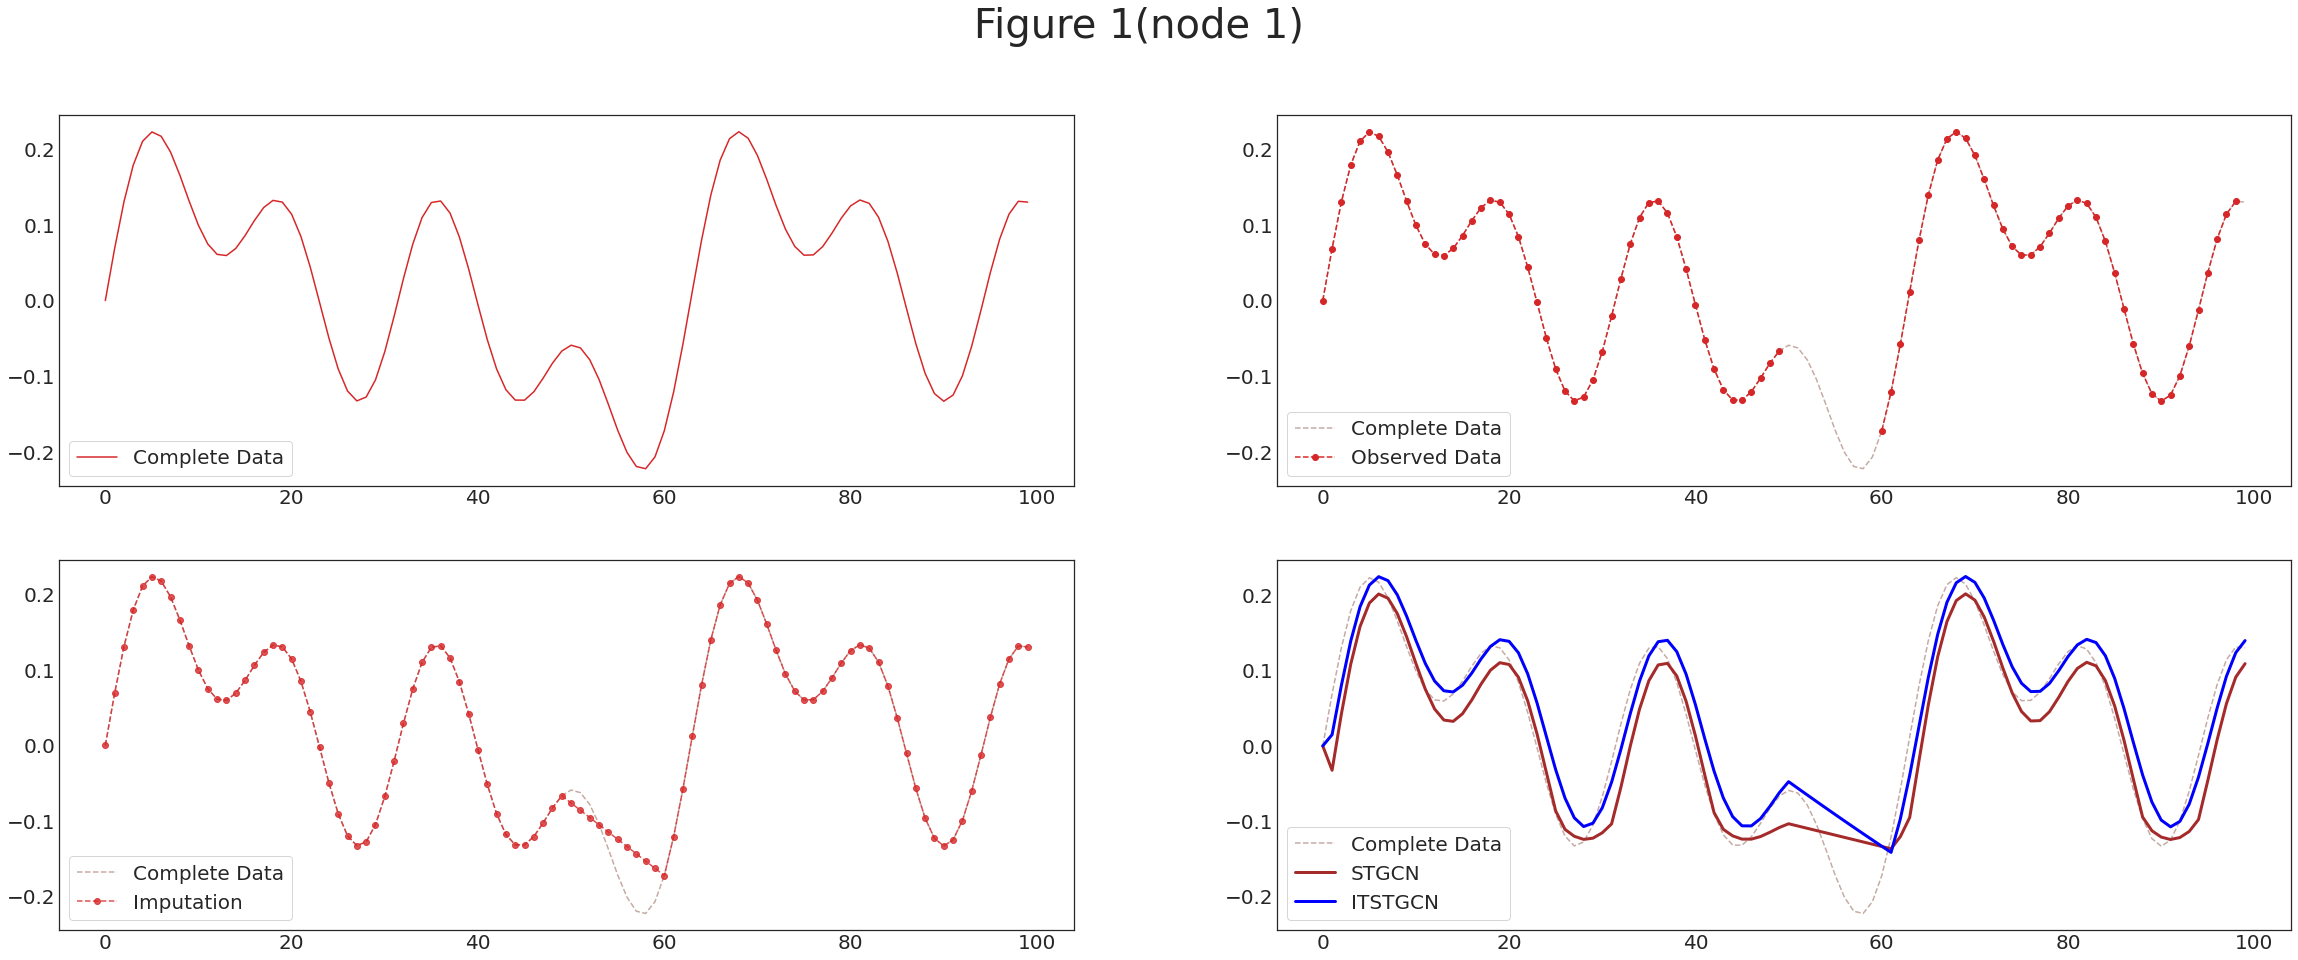

In [2703]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,0],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_GConvGRU7.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor_GConvGRU7.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_GConvGRU8.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(58, -0.15, 'o', markersize=120, markerfacecolor='none', markeredgecolor='red',markeredgewidth=2)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

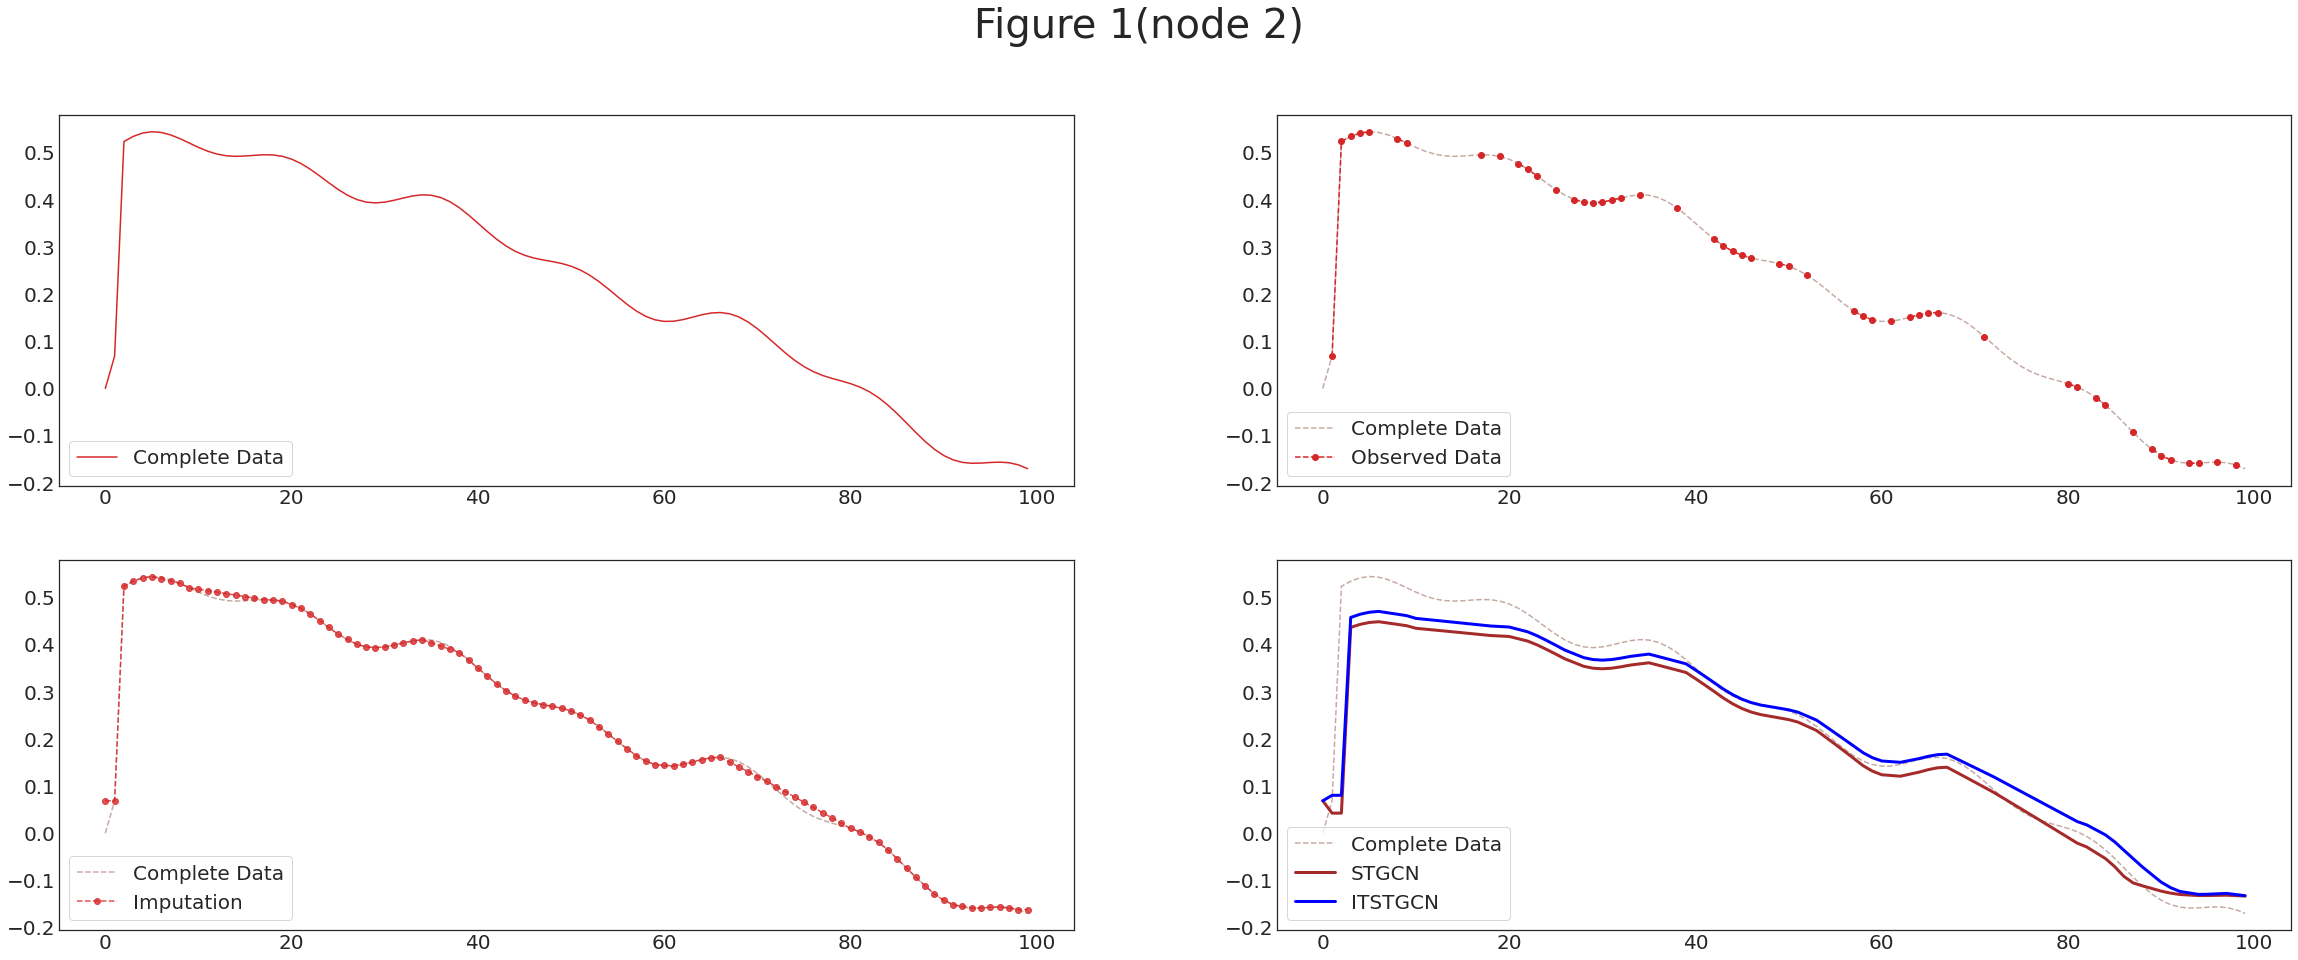

In [2704]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.features).reshape(-1,2)[:,1],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_GConvGRU7.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Imputation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor_GConvGRU7.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_GConvGRU8.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot((mindex[1][0][0]+mindex[1][0][len(mindex[1][0])-1])/2, 0.1,'s', markersize=110, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

# DCRNN

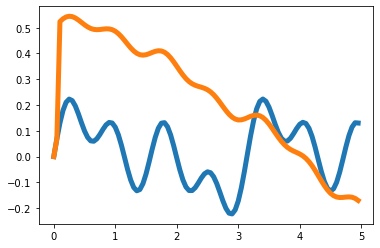

In [3056]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [3057]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3058]:
dataset = loader1.get_dataset(lags=1)

In [3059]:
mindex = itstgcn.rand_mindex(dataset,mrate=0.2)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [3060]:
mindex = [random.sample(range(0, T), int(T*0.3)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3061]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [3062]:
lrnr_DCRNN = itstgcntry.StgcnLearner(dataset_padded)

In [3063]:
model_DCRNN = itstgcntry.DCRNN_RecurrentGCN(dataset_padded,filters=32)

In [3064]:
lrnr_DCRNN.learn(model_DCRNN,epoch=5)

In [3048]:
lrnr_DCRNN1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [3049]:
model_DCRNN1 = itstgcntry.DCRNN_RecurrentGCN(dataset_padded,filters=32)

In [3050]:
lrnr_DCRNN1.learn(model_DCRNN1,epoch=5)

In [3051]:
evtor_DCRNN = Eval_csy(lrnr_DCRNN,dataset_padded)

In [3052]:
evtor_DCRNN1 = Eval_csy(lrnr_DCRNN1,dataset_padded)

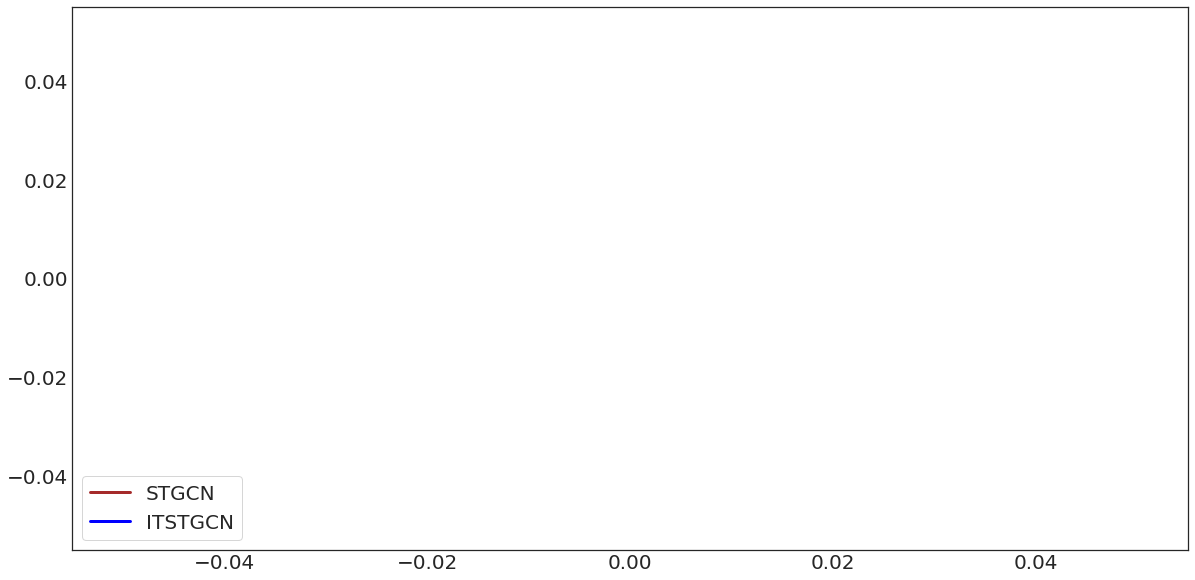

In [3053]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    # ax.plot(evtor_DCRNN.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    # ax.plot(df1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_DCRNN.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_DCRNN1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

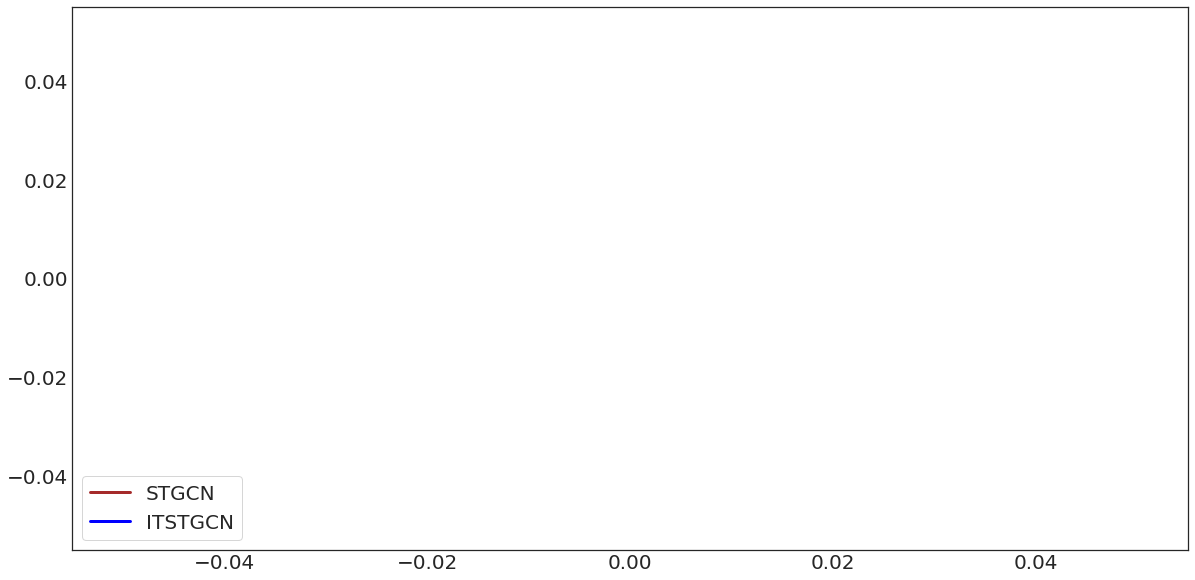

In [3054]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    # ax.plot(evtor_DCRNN.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    # ax.plot(df1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_DCRNN.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_DCRNN1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

?

In [3025]:
loader2 = itstgcntry.PedalMeDatasetLoader()

In [3026]:
dataset = loader2.get_dataset(lags=1)

In [3027]:
mindex = itstgcn.rand_mindex(dataset,mrate=0.4)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

mindex = [random.sample(range(0, T), int(T*0.3)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3028]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [3029]:
lrnr_DCRNN = itstgcntry.StgcnLearner(dataset_padded)

In [3030]:
model_DCRNN = itstgcntry.DCRNN_RecurrentGCN(dataset_padded,filters=16)

In [3031]:
lrnr_DCRNN.learn(model_DCRNN,epoch=20)

In [3032]:
lrnr_DCRNN1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [3033]:
model_DCRNN1 = itstgcntry.DCRNN_RecurrentGCN(dataset_padded,filters=16)

In [3034]:
lrnr_DCRNN1.learn(model_DCRNN1,epoch=20)

In [3035]:
evtor_DCRNN = Eval_csy(lrnr_DCRNN,dataset_padded)

In [3036]:
evtor_DCRNN1 = Eval_csy(lrnr_DCRNN1,dataset_padded)

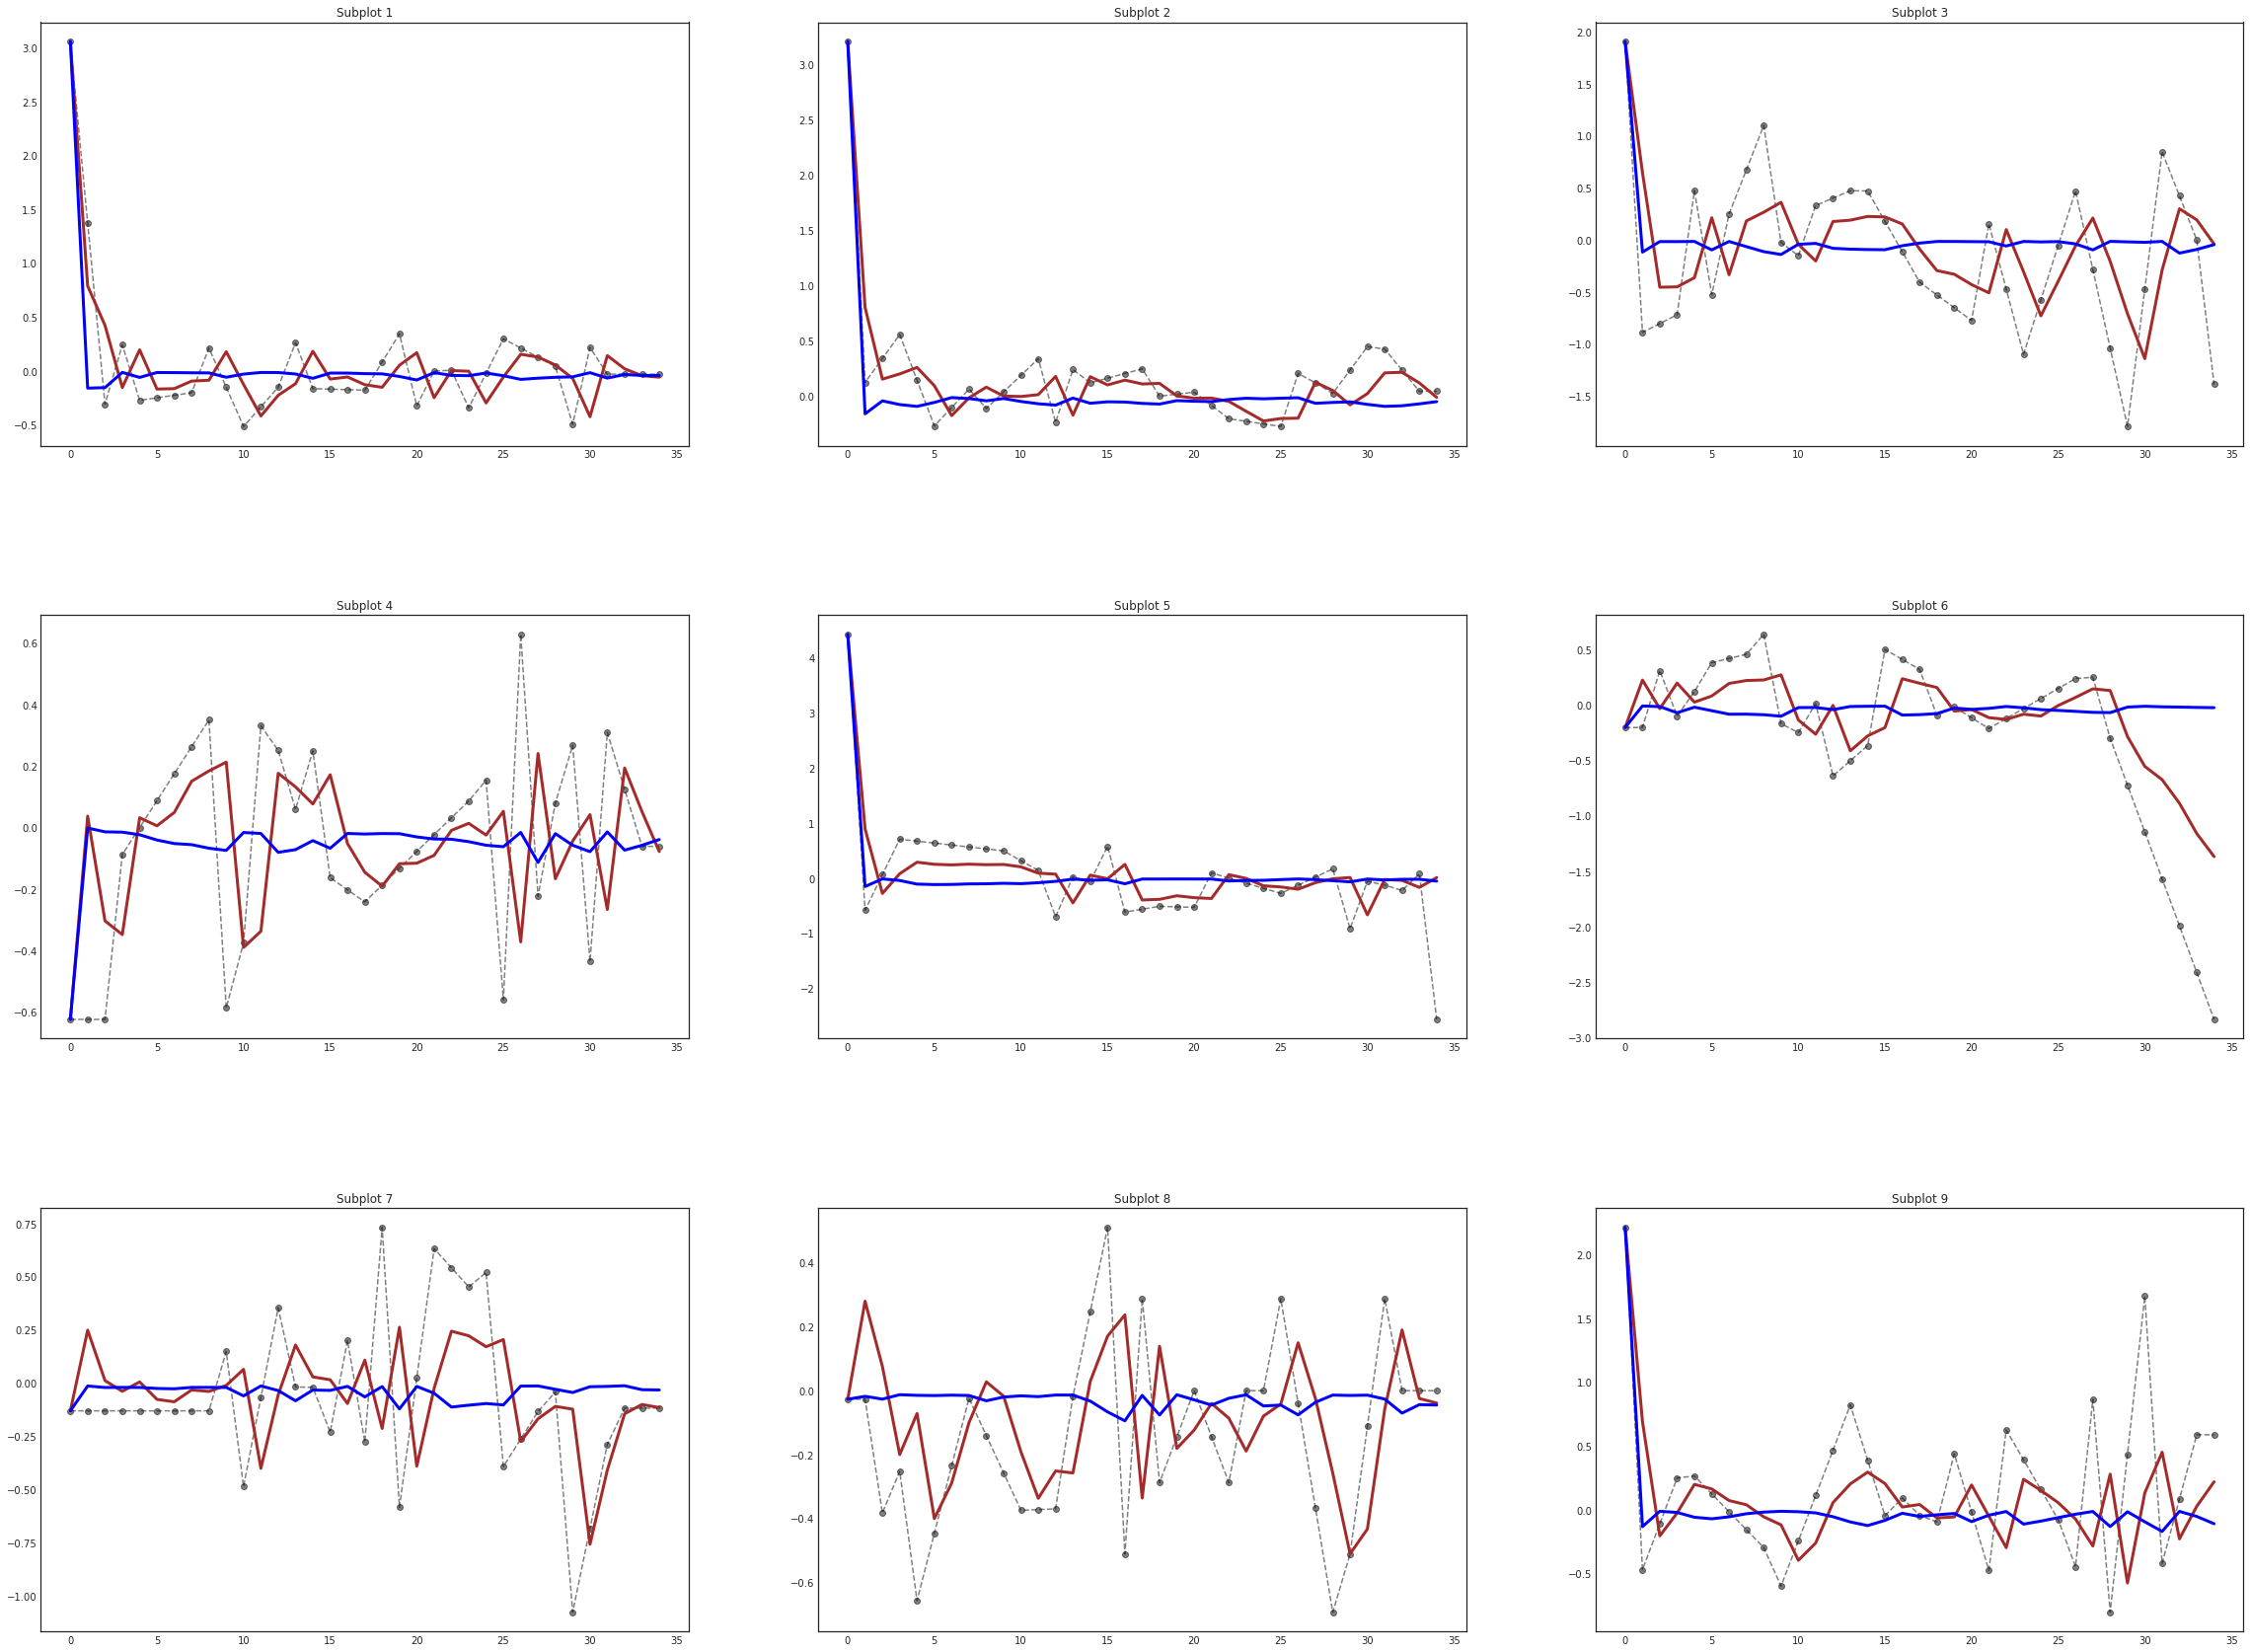

In [3037]:
with plt.style.context('seaborn-white'):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 30))
    fig.subplots_adjust(hspace=0.4)  # Adjust the vertical space between subplots
    
    for i, ax in enumerate(axes.flatten()):
        # Plot something on each subplot
        ax.set_title(f'Subplot {i+1}')
        ax.plot(evtor_DCRNN.f_tr[:,i],'--o',color='black',alpha=0.5,label='Imputation')
        ax.plot(evtor_DCRNN.fhat_tr[:,i],color='brown',lw=3,label='STGCN')
        ax.plot(evtor_DCRNN1.fhat_tr[:,i],color='blue',lw=3,label='ITSTGCN')

# GConvLSTM

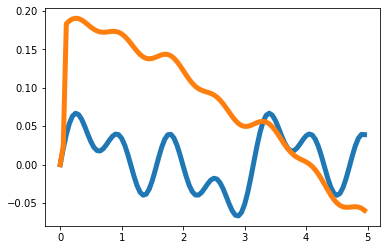

In [3419]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = 0.3*x
y = 0.35*y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [3420]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3421]:
dataset = loader1.get_dataset(lags=1)

mindex = itstgcn.rand_mindex(dataset,mrate=0.5)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [3422]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3423]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [3424]:
lrnr_GConvLSTM = itstgcntry.StgcnLearner(dataset_padded)

In [3425]:
model_GConvLSTM = itstgcntry.GConvLSTM_RecurrentGCN(dataset_padded,filters=32)

In [3426]:
lrnr_GConvLSTM.learn(model_GConvLSTM,epoch=10)

In [3427]:
lrnr_GConvLSTM1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [3428]:
model_GConvLSTM1 = itstgcntry.GConvLSTM_RecurrentGCN(dataset_padded,filters=32)

In [3429]:
lrnr_GConvLSTM1.learn(model_GConvLSTM1,epoch=10)

In [3430]:
evtor_GConvLSTM = Eval_csy(lrnr_GConvLSTM,dataset_padded)

In [3431]:
evtor_GConvLSTM1 = Eval_csy(lrnr_GConvLSTM1,dataset_padded)

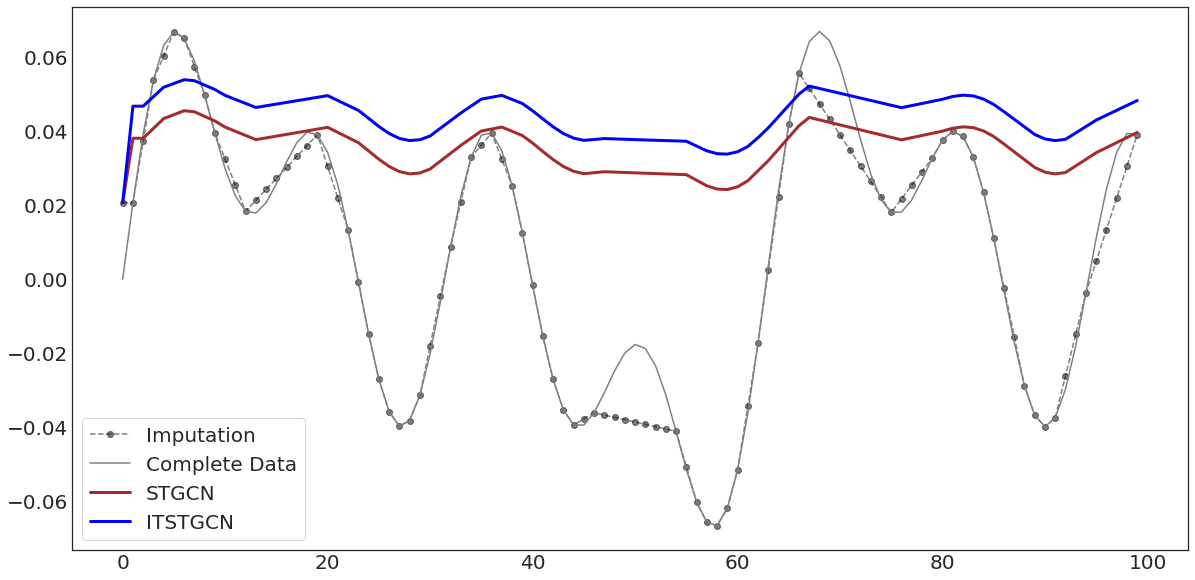

In [3432]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvLSTM.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvLSTM.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvLSTM1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

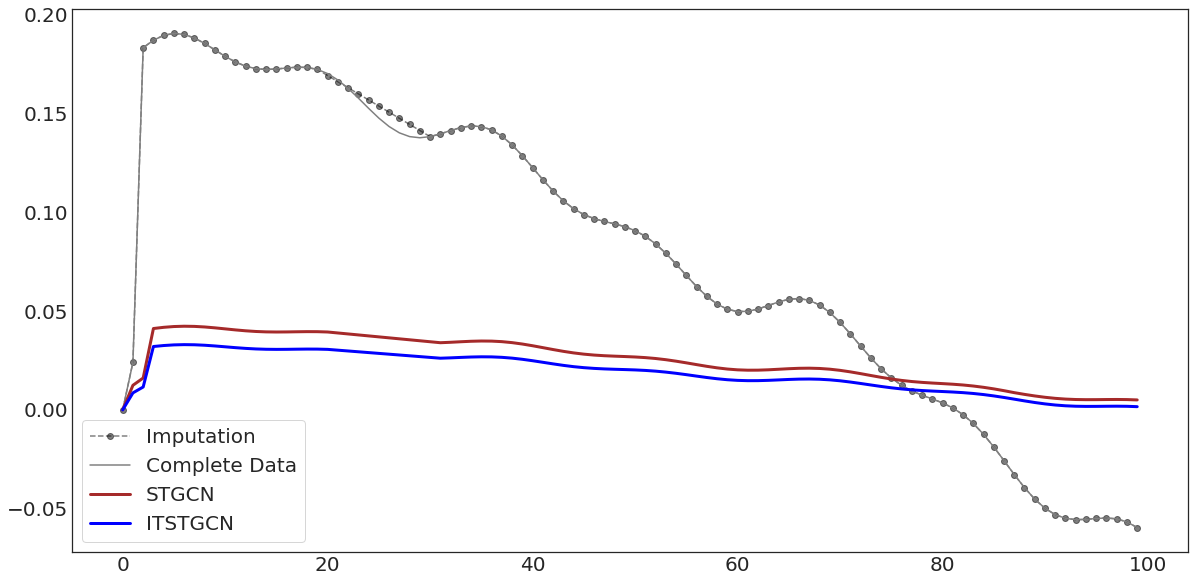

In [3433]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvLSTM.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvLSTM.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvLSTM1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# MPNNLSTM

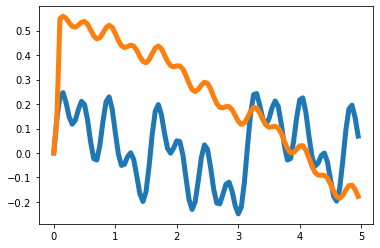

In [3450]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)+0.1*np.sin(16*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i])  
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [3451]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3452]:
dataset = loader1.get_dataset(lags=4)

mindex = itstgcn.rand_mindex(dataset,mrate=0.5)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [3453]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3454]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [3465]:
lrnr_MPNNLSTM = itstgcntry.StgcnLearner(dataset_padded)

In [3466]:
model_MPNNLSTM = itstgcntry.MPNNLSTM_RecurrentGCN(dataset_padded,filters=4)

In [3467]:
lrnr_MPNNLSTM.learn(model_MPNNLSTM,epoch=30)

In [3468]:
lrnr_MPNNLSTM1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [3469]:
model_MPNNLSTM1 = itstgcntry.MPNNLSTM_RecurrentGCN(dataset_padded,filters=4)

In [3470]:
lrnr_MPNNLSTM1.learn(model_MPNNLSTM1,epoch=13)

In [3471]:
evtor_MPNNLSTM = Eval_csy(lrnr_MPNNLSTM,dataset_padded)

In [3472]:
evtor_MPNNLSTM1 = Eval_csy(lrnr_MPNNLSTM1,dataset_padded)

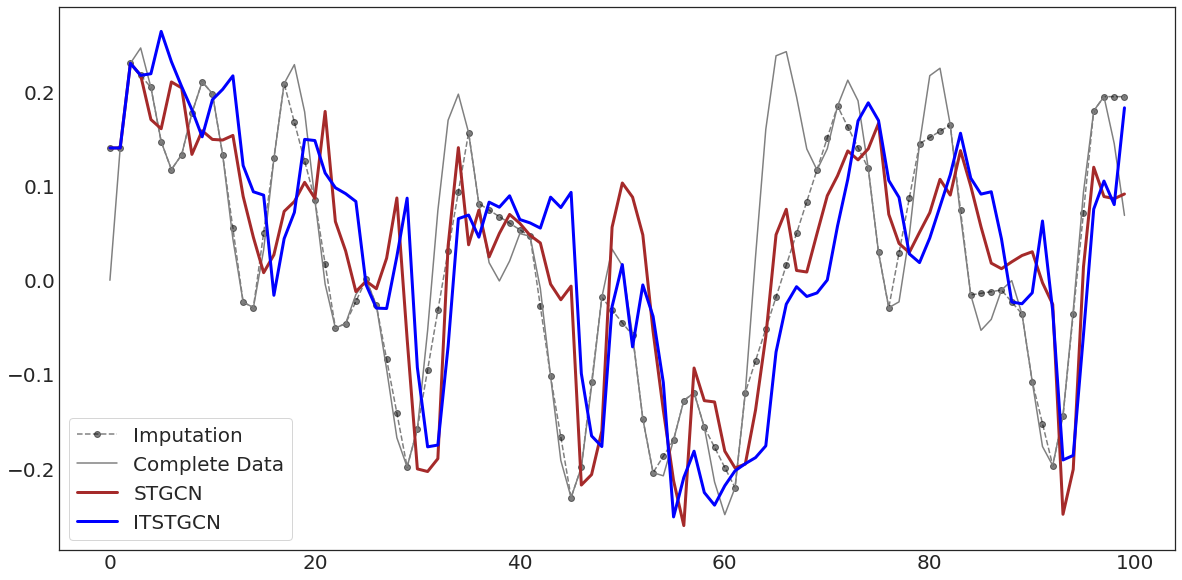

In [3473]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_MPNNLSTM.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_MPNNLSTM.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_MPNNLSTM1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

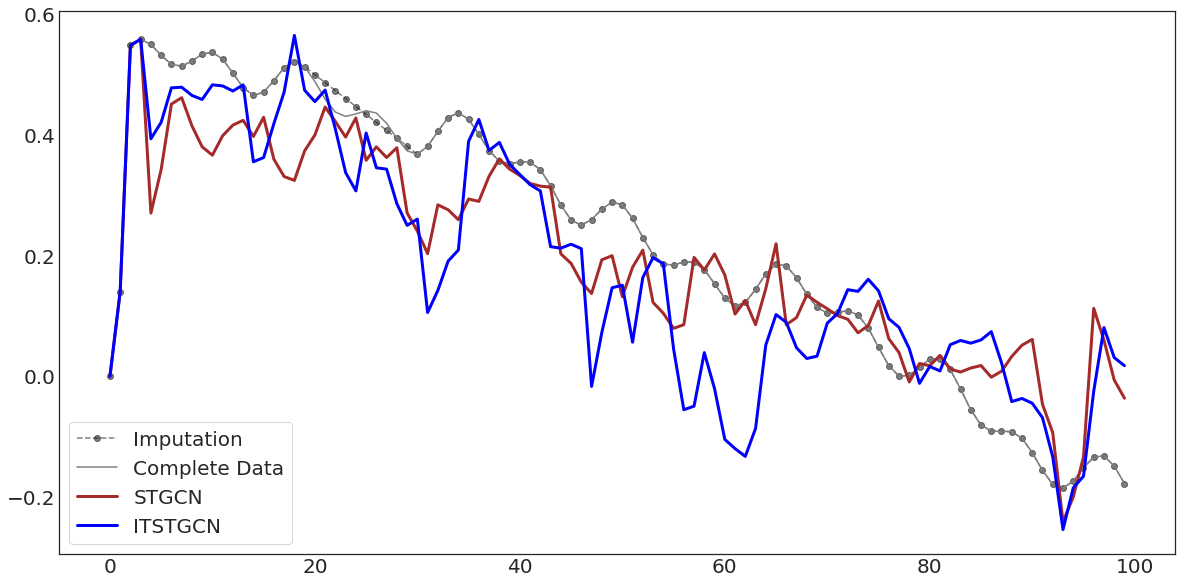

In [3474]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_MPNNLSTM.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_MPNNLSTM.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_MPNNLSTM1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# TGCN

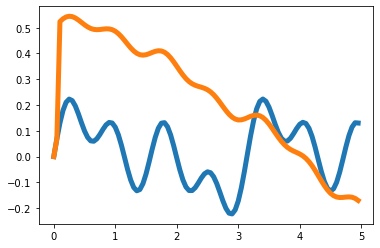

In [3634]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [3635]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3636]:
dataset = loader1.get_dataset(lags=1)

mindex = itstgcn.rand_mindex(dataset,mrate=0.5)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [3637]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3638]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [3639]:
lrnr_TGCN = itstgcntry.StgcnLearner(dataset_padded)

In [3640]:
model_TGCN = itstgcntry.TGCN_RecurrentGCN(dataset_padded,filters=8)

In [3641]:
lrnr_TGCN.learn(model_TGCN,epoch=50)

In [3642]:
lrnr_TGCN1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [3643]:
model_TGCN1 = itstgcntry.TGCN_RecurrentGCN(dataset_padded,filters=8)

In [3644]:
lrnr_TGCN1.learn(model_TGCN1,epoch=50)

In [3645]:
evtor_TGCN = Eval_csy(lrnr_TGCN,dataset_padded)

In [3646]:
evtor_TGCN1 = Eval_csy(lrnr_TGCN1,dataset_padded)

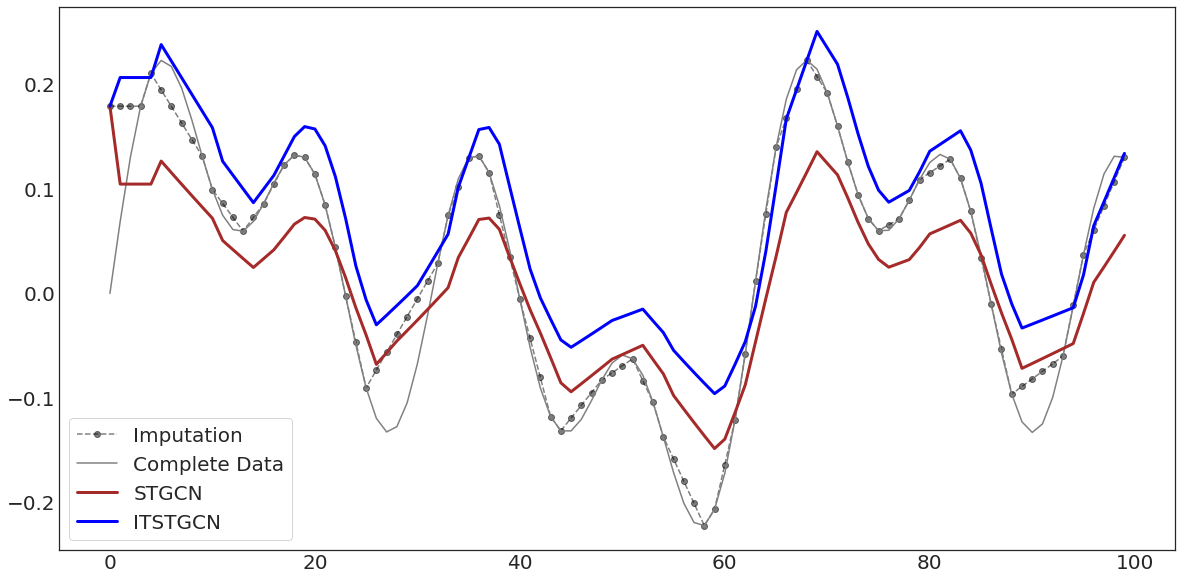

In [3647]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_TGCN.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_TGCN.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_TGCN1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

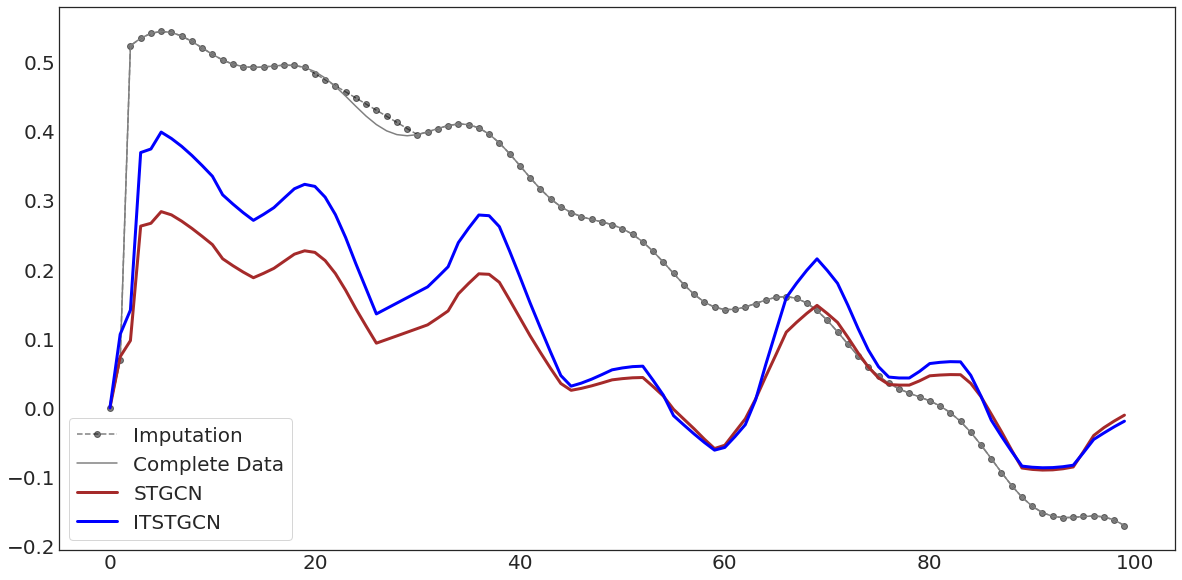

In [3648]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_TGCN.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_TGCN.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_TGCN1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# EvolveGCNO

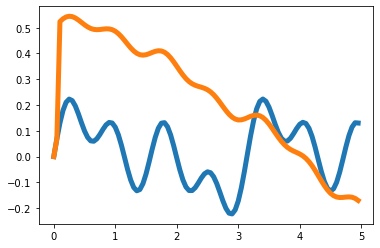

In [833]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [834]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [913]:
dataset = loader1.get_dataset(lags=4)

mindex = itstgcn.rand_mindex(dataset,mrate=0.5)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [937]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(60,70)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [938]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [958]:
lrnr_EvolveGCNO = itstgcntry.StgcnLearner(dataset_padded)

In [985]:
model_EvolveGCNO = itstgcntry.EvolveGCNO_RecurrentGCN(dataset_padded,filters=2)

In [994]:
lrnr_EvolveGCNO.learn(model_EvolveGCNO,epoch=20)

In [995]:
lrnr_EvolveGCNO1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [996]:
model_EvolveGCNO1 = itstgcntry.EvolveGCNO_RecurrentGCN(dataset_padded,filters=2)

In [997]:
lrnr_EvolveGCNO1.learn(model_EvolveGCNO1,epoch=20)

In [998]:
evtor_EvolveGCNO = Eval_csy(lrnr_EvolveGCNO,dataset_padded)

In [999]:
evtor_EvolveGCNO1 = Eval_csy(lrnr_EvolveGCNO1,dataset_padded)

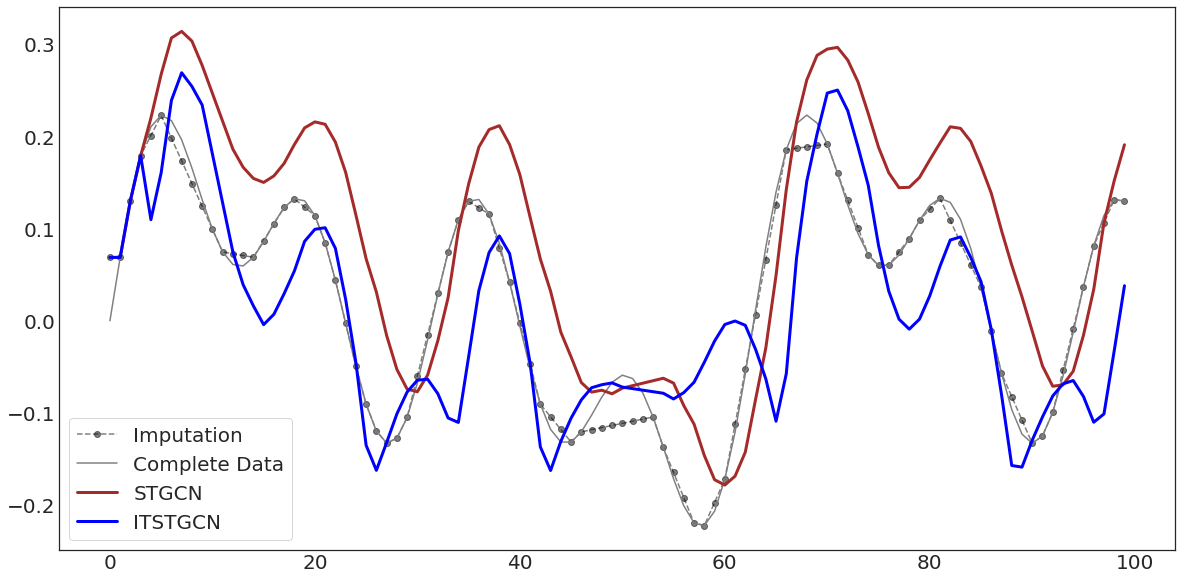

In [1000]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_EvolveGCNO.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_EvolveGCNO.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_EvolveGCNO1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

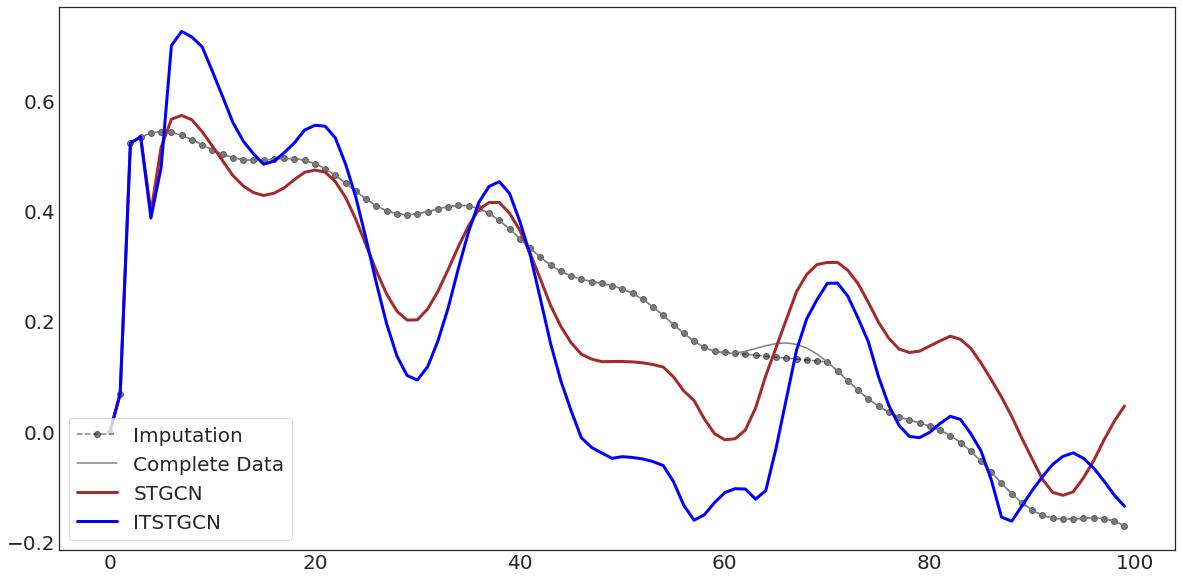

In [1001]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_EvolveGCNO.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_EvolveGCNO.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_EvolveGCNO1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# GCLSTM

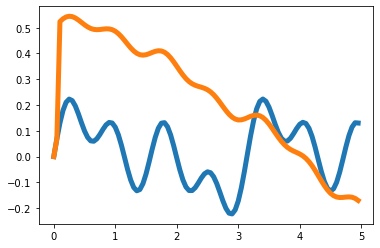

In [3589]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [3590]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3591]:
dataset = loader1.get_dataset(lags=1)

mindex = itstgcn.rand_mindex(dataset,mrate=0.5)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [3592]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3593]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [3594]:
lrnr_GCLSTM = itstgcntry.StgcnLearner(dataset_padded)

In [3595]:
model_GCLSTM = itstgcntry.GCLSTM_RecurrentGCN(dataset_padded,filters=4)

In [3596]:
lrnr_GCLSTM.learn(model_GCLSTM,epoch=30)

In [3597]:
lrnr_GCLSTM1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [3598]:
model_GCLSTM1 = itstgcntry.TGCN_RecurrentGCN(dataset_padded,filters=4)

In [3599]:
lrnr_GCLSTM1.learn(model_GCLSTM1,epoch=30)

In [3600]:
evtor_GCLSTM = Eval_csy(lrnr_GCLSTM,dataset_padded)

In [3601]:
evtor_GCLSTM1 = Eval_csy(lrnr_GCLSTM1,dataset_padded)

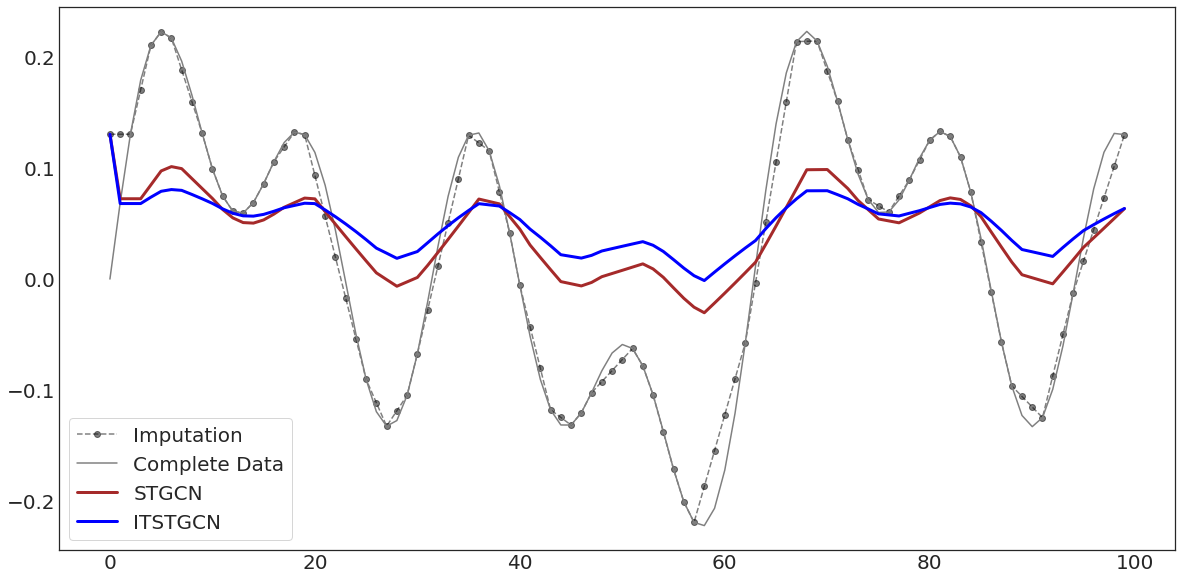

In [3602]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GCLSTM.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GCLSTM.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GCLSTM1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

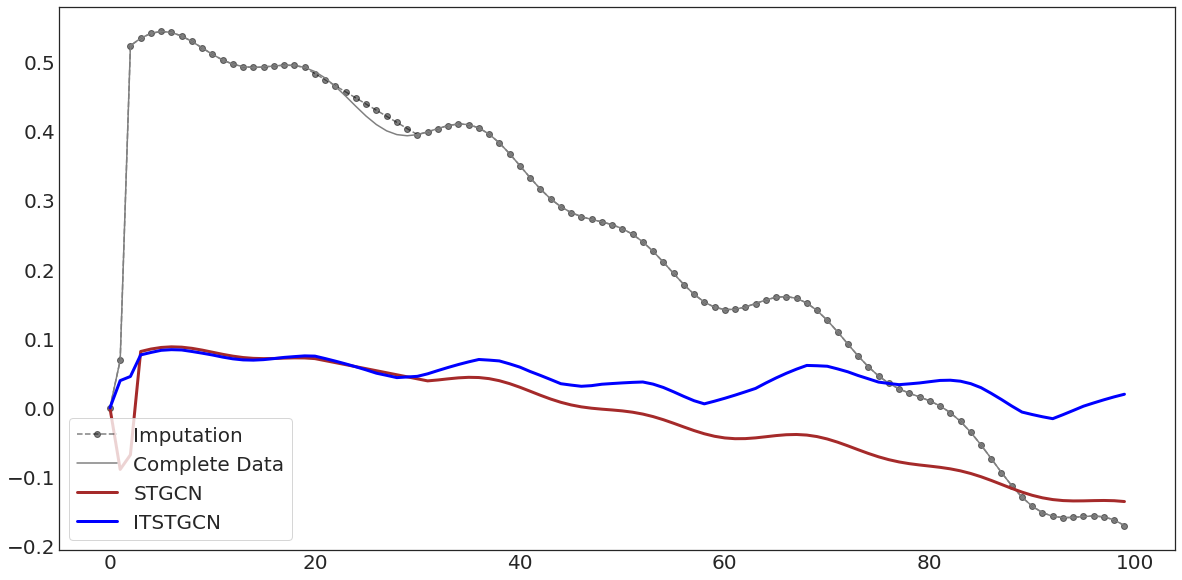

In [3603]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GCLSTM.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GCLSTM.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GCLSTM1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# LRGCN

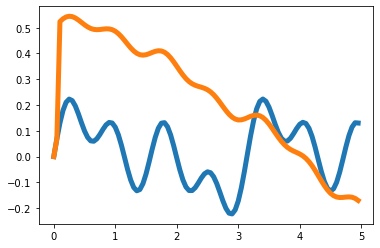

In [3566]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [3567]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3568]:
dataset = loader1.get_dataset(lags=1)

mindex = itstgcn.rand_mindex(dataset,mrate=0.5)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [3569]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3570]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [3571]:
lrnr_LRGCN = itstgcntry.StgcnLearner(dataset_padded)

In [3572]:
model_LRGCN = itstgcntry.LRGCN_RecurrentGCN(dataset_padded,filters=12)

In [3581]:
lrnr_LRGCN.learn(model_LRGCN,epoch=30)

In [3582]:
lrnr_LRGCN1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [3583]:
model_LRGCN1 = itstgcntry.LRGCN_RecurrentGCN(dataset_padded,filters=12)

In [3584]:
lrnr_LRGCN1.learn(model_LRGCN1,epoch=30)

In [3585]:
evtor_LRGCN = Eval_csy(lrnr_LRGCN,dataset_padded)

In [3586]:
evtor_LRGCN1 = Eval_csy(lrnr_LRGCN1,dataset_padded)

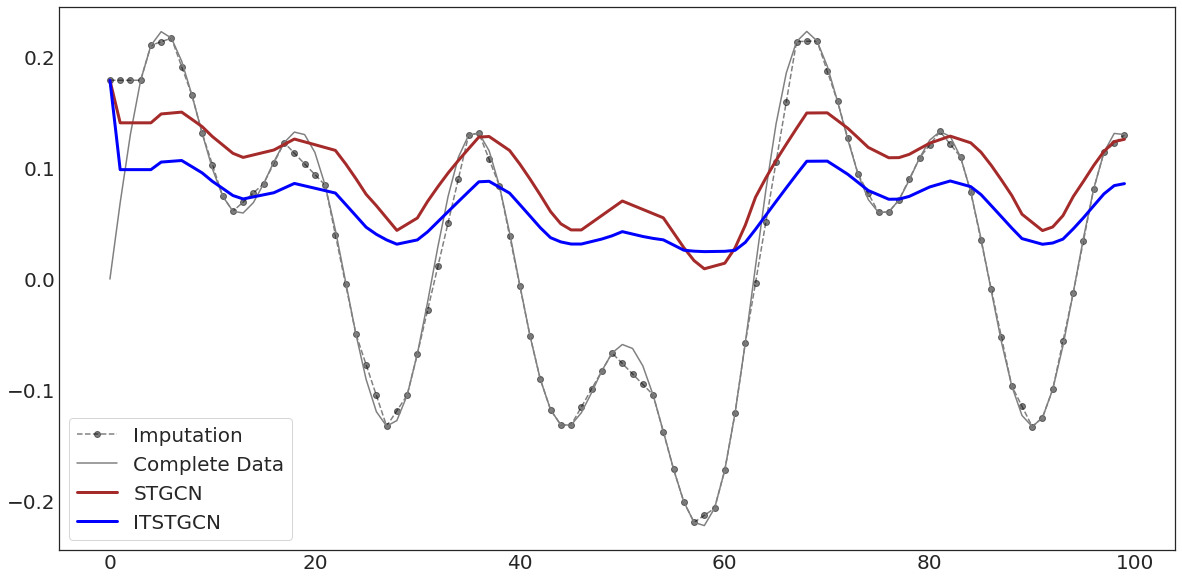

In [3587]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_LRGCN.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_LRGCN.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_LRGCN1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

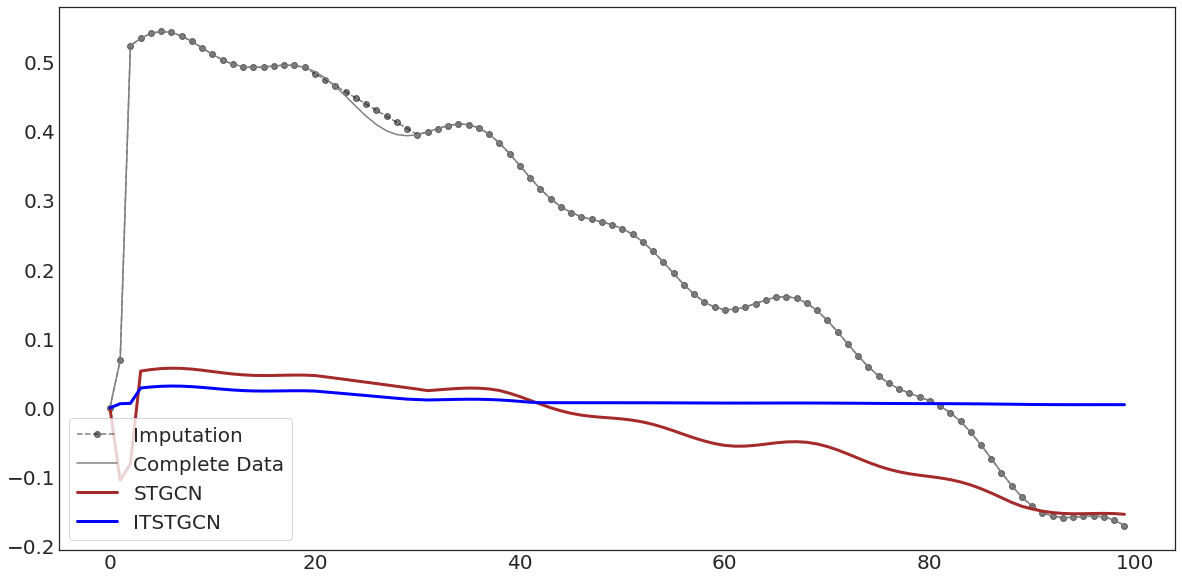

In [3588]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_LRGCN.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_LRGCN.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_LRGCN1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# EvolveGCNH

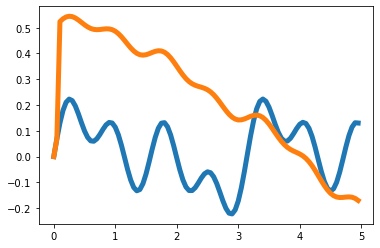

In [1139]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [1140]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [1152]:
dataset = loader1.get_dataset(lags=1)

mindex = itstgcn.rand_mindex(dataset,mrate=0.5)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [1153]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [1154]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [1155]:
lrnr_EvolveGCNH = itstgcntry.StgcnLearner(dataset_padded)

In [1194]:
model_EvolveGCNH = itstgcntry.EvolveGCNH_RecurrentGCN(dataset_padded,filters=16)

In [1203]:
lrnr_EvolveGCNH.learn(model_EvolveGCNH,epoch=50)

In [1204]:
lrnr_EvolveGCNH1 = itstgcntry.ITStgcnLearner(dataset_padded)

In [1205]:
model_EvolveGCNH1 = itstgcntry.EvolveGCNH_RecurrentGCN(dataset_padded,filters=16)

In [1206]:
lrnr_EvolveGCNH1.learn(model_EvolveGCNH1,epoch=50)

In [1207]:
evtor_EvolveGCNH = Eval_csy(lrnr_EvolveGCNH,dataset_padded)

In [1208]:
evtor_EvolveGCNH1 = Eval_csy(lrnr_EvolveGCNH1,dataset_padded)

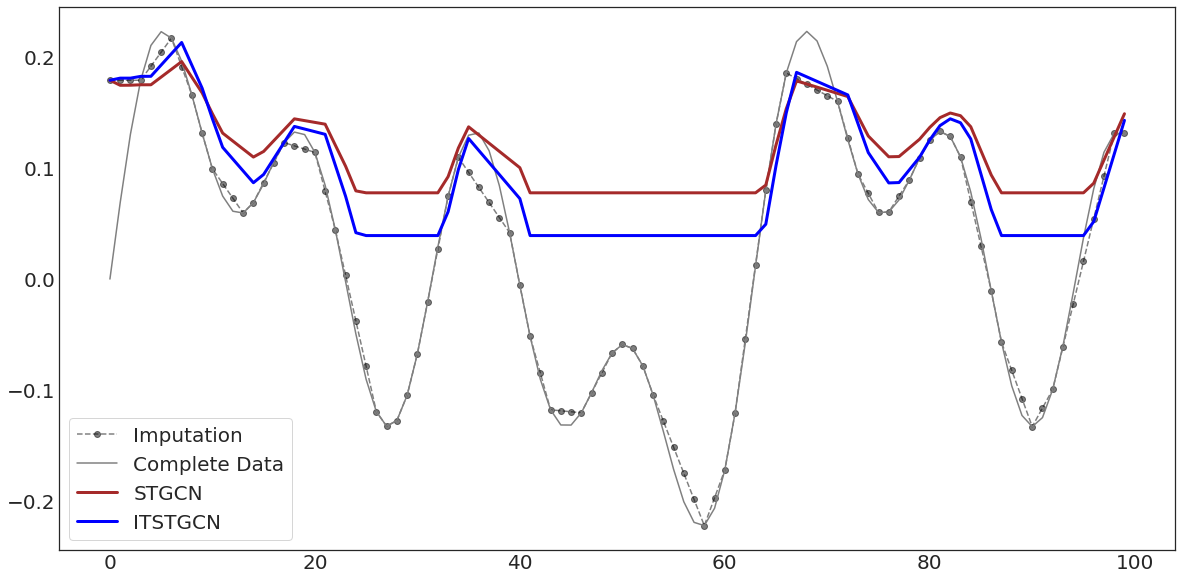

In [1209]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_EvolveGCNH.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_EvolveGCNH.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_EvolveGCNH1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

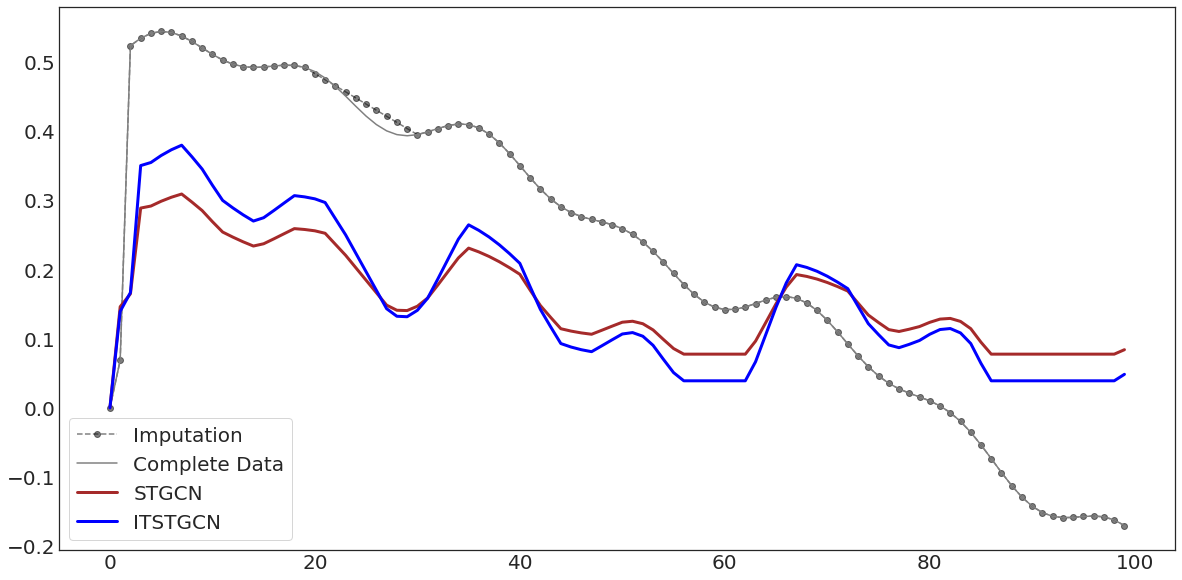

In [1210]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_EvolveGCNH.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(df1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_EvolveGCNH.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_EvolveGCNH1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)